___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
# stopwords - collection of words that don't provide any meaning to a sentence
from nltk.corpus import stopwords
# WordNetLemmatizer - used to convert different forms of words into a single item but still keeping the context intact
from nltk.stem import WordNetLemmatizer 

%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (12,8)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)


In [2]:
#%pip install --upgrade scikit-learn

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lavondaharrison/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lavondaharrison/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lavondaharrison/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df = pd.read_csv("/Users/lavondaharrison/Desktop/Clarusway/Machine Learning Module/NLP/NLP Project/Project NLP/Womens Clothing E-Commerce Reviews.csv")
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Absolutely wonderful - silky and sexy and comfortable   
1                                                                                                                                                                                                       Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c   
3                                                                                                                                                                                                                                                                                                                                                                                          I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                                                                                                                                                                                                                                      This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   

  Department Name Class Name  
0        Intimate  Intimates  
1         Dresses    Dresses  
2         Dresses    Dresses  
3         Bottoms      Pants  
4            Tops

In [5]:
import matplotlib
matplotlib.__version__

'3.4.0'

In [6]:
df.shape

(23486, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


### Data Wrangling

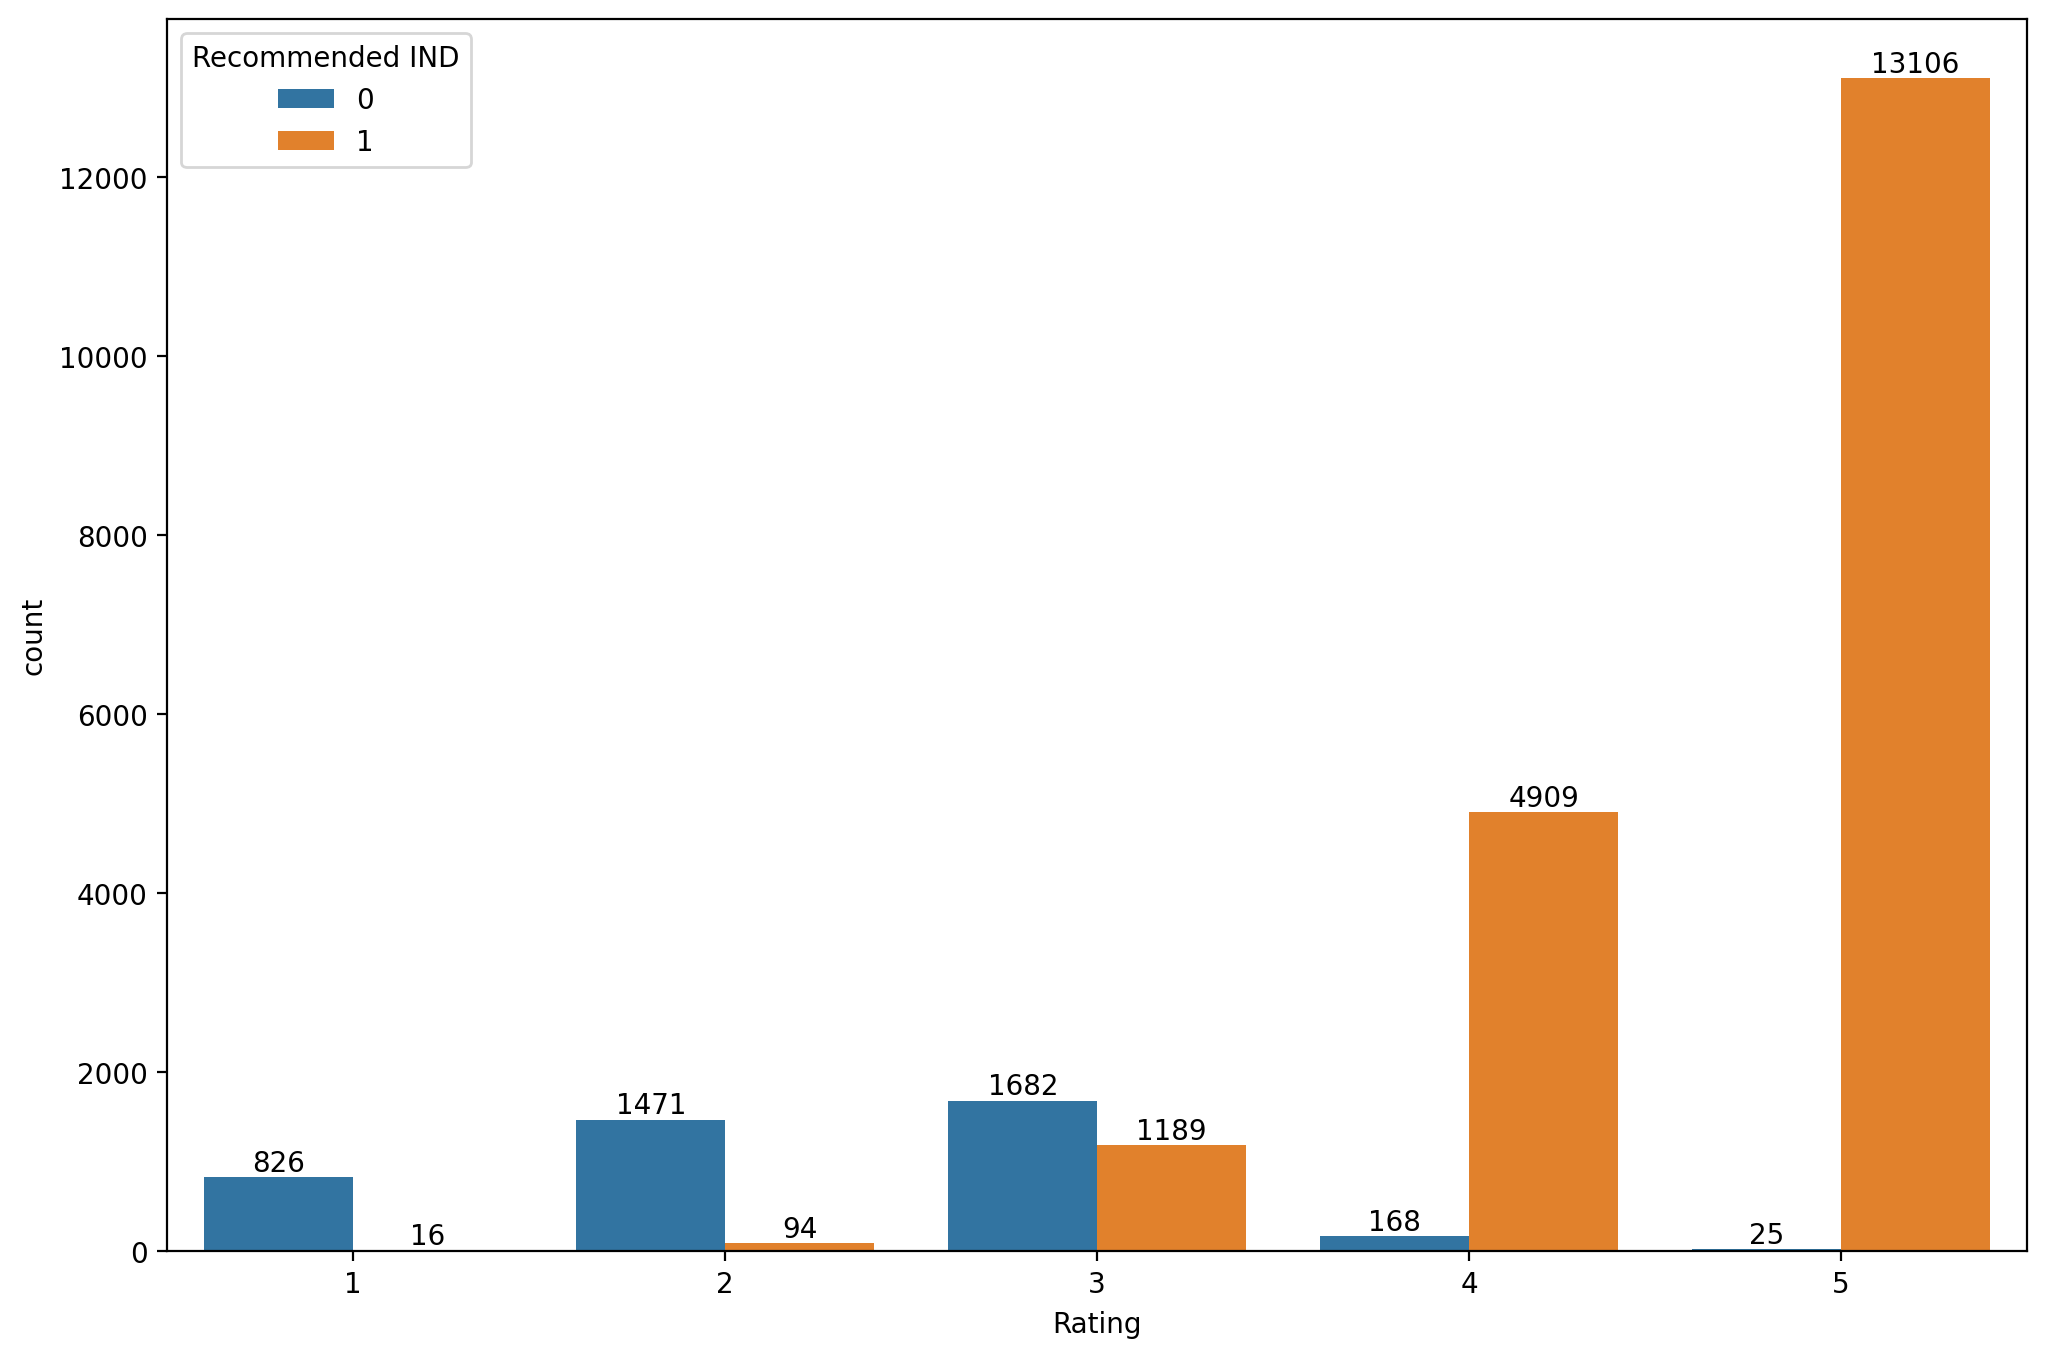

In [8]:
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [9]:
#len(df.loc[(df["Rating"] != 1) | (df["Recommended IND"] != 1)])

In [10]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1)) & ~((df["Rating"] == 2) & (df["Recommended IND"] == 1)) & ~((df["Rating"] == 3) & (df["Recommended IND"] == 1)) & ~((df["Rating"] == 4) & (df["Recommended IND"] == 0)) & ~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

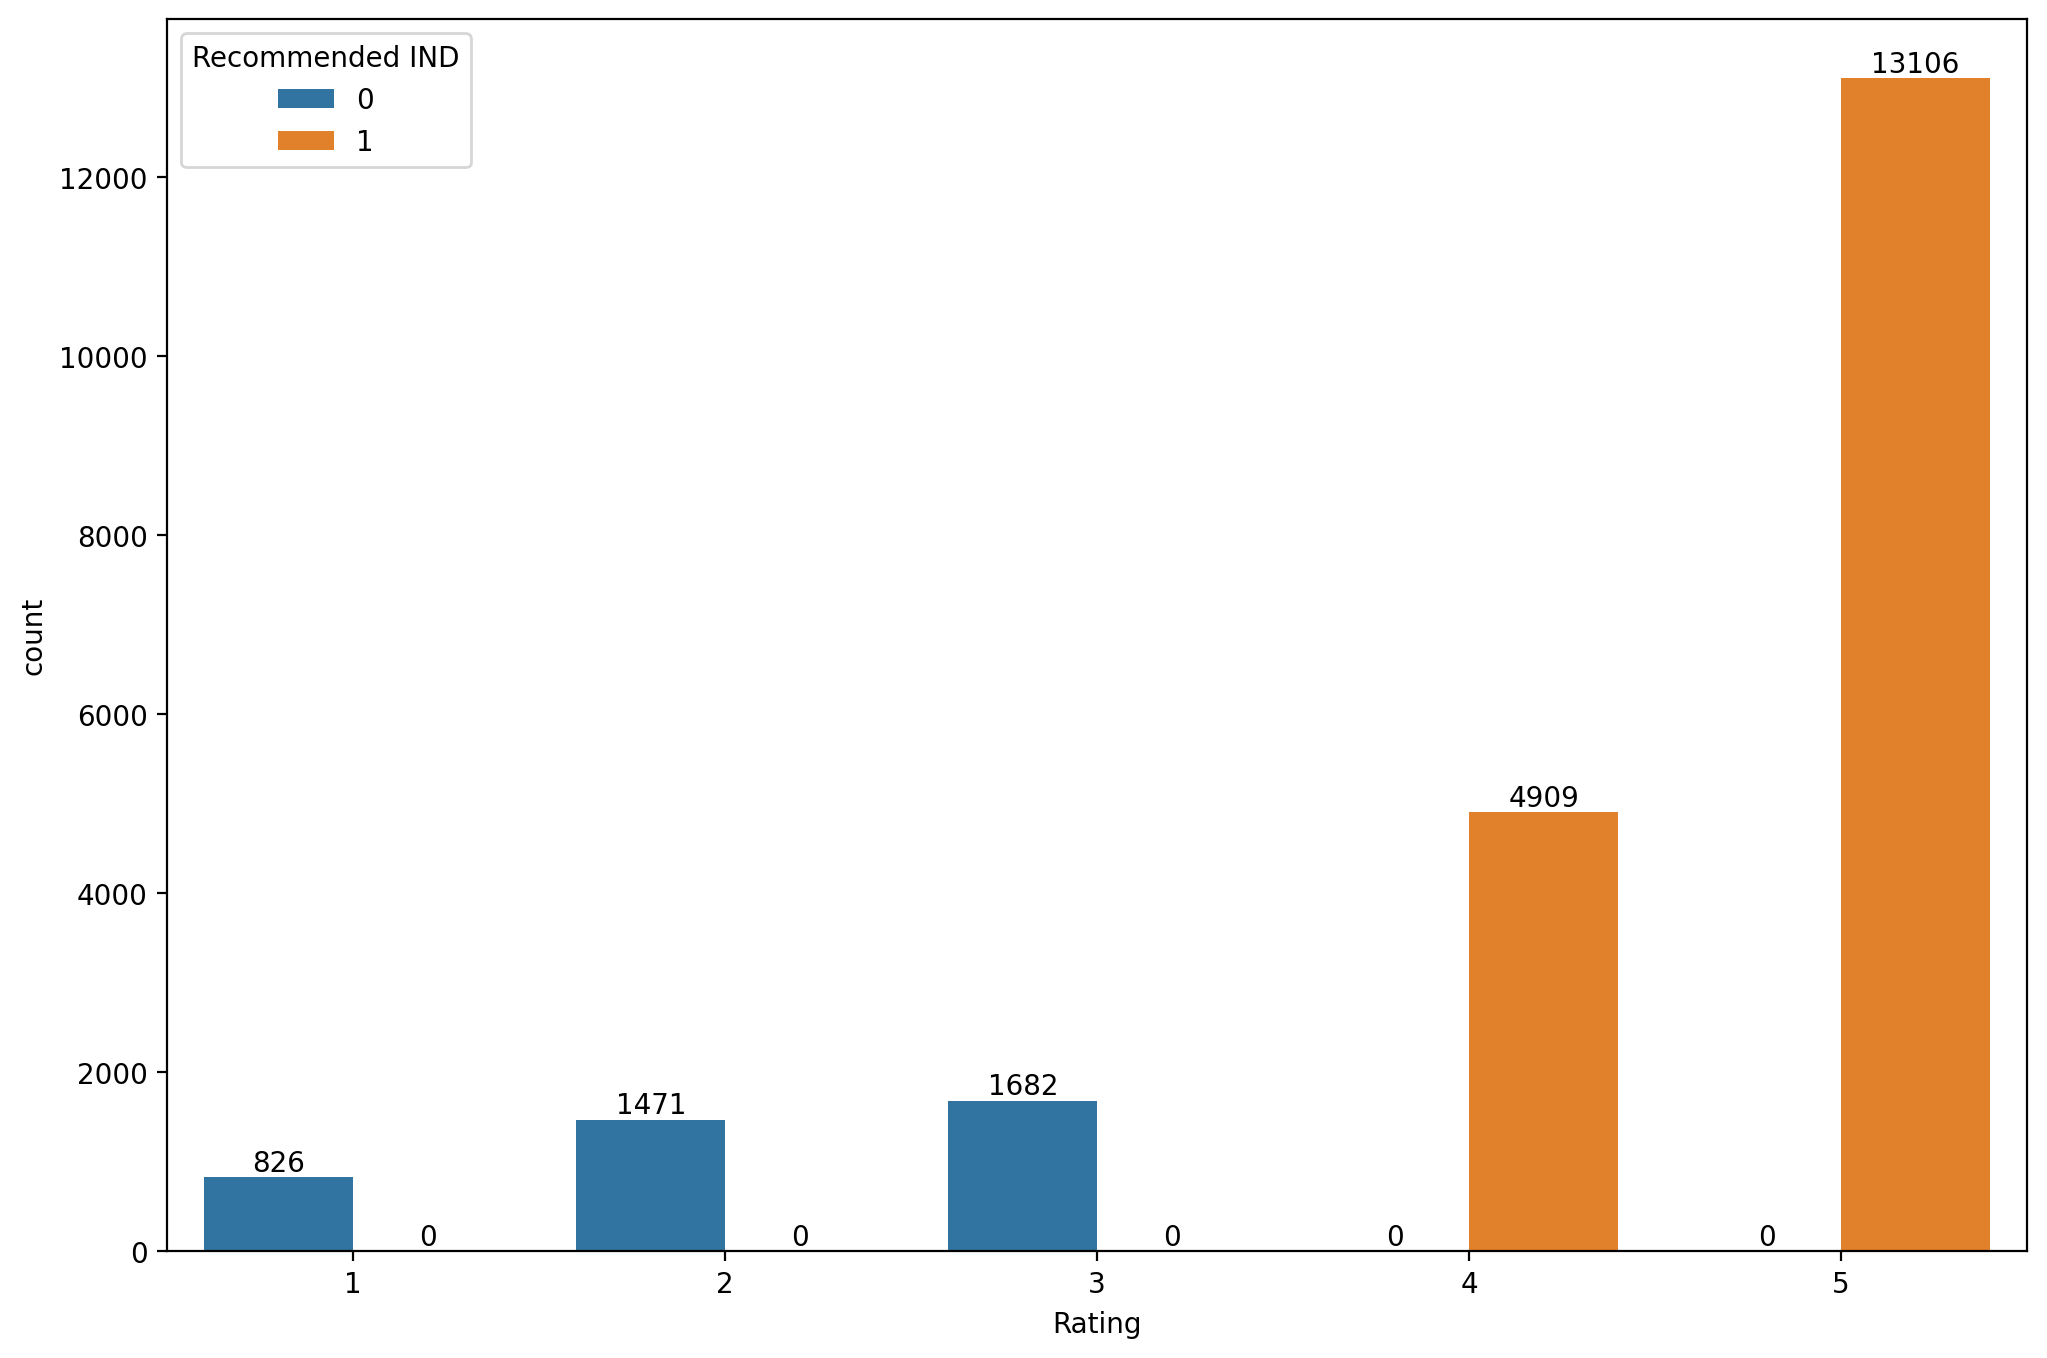

In [11]:
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

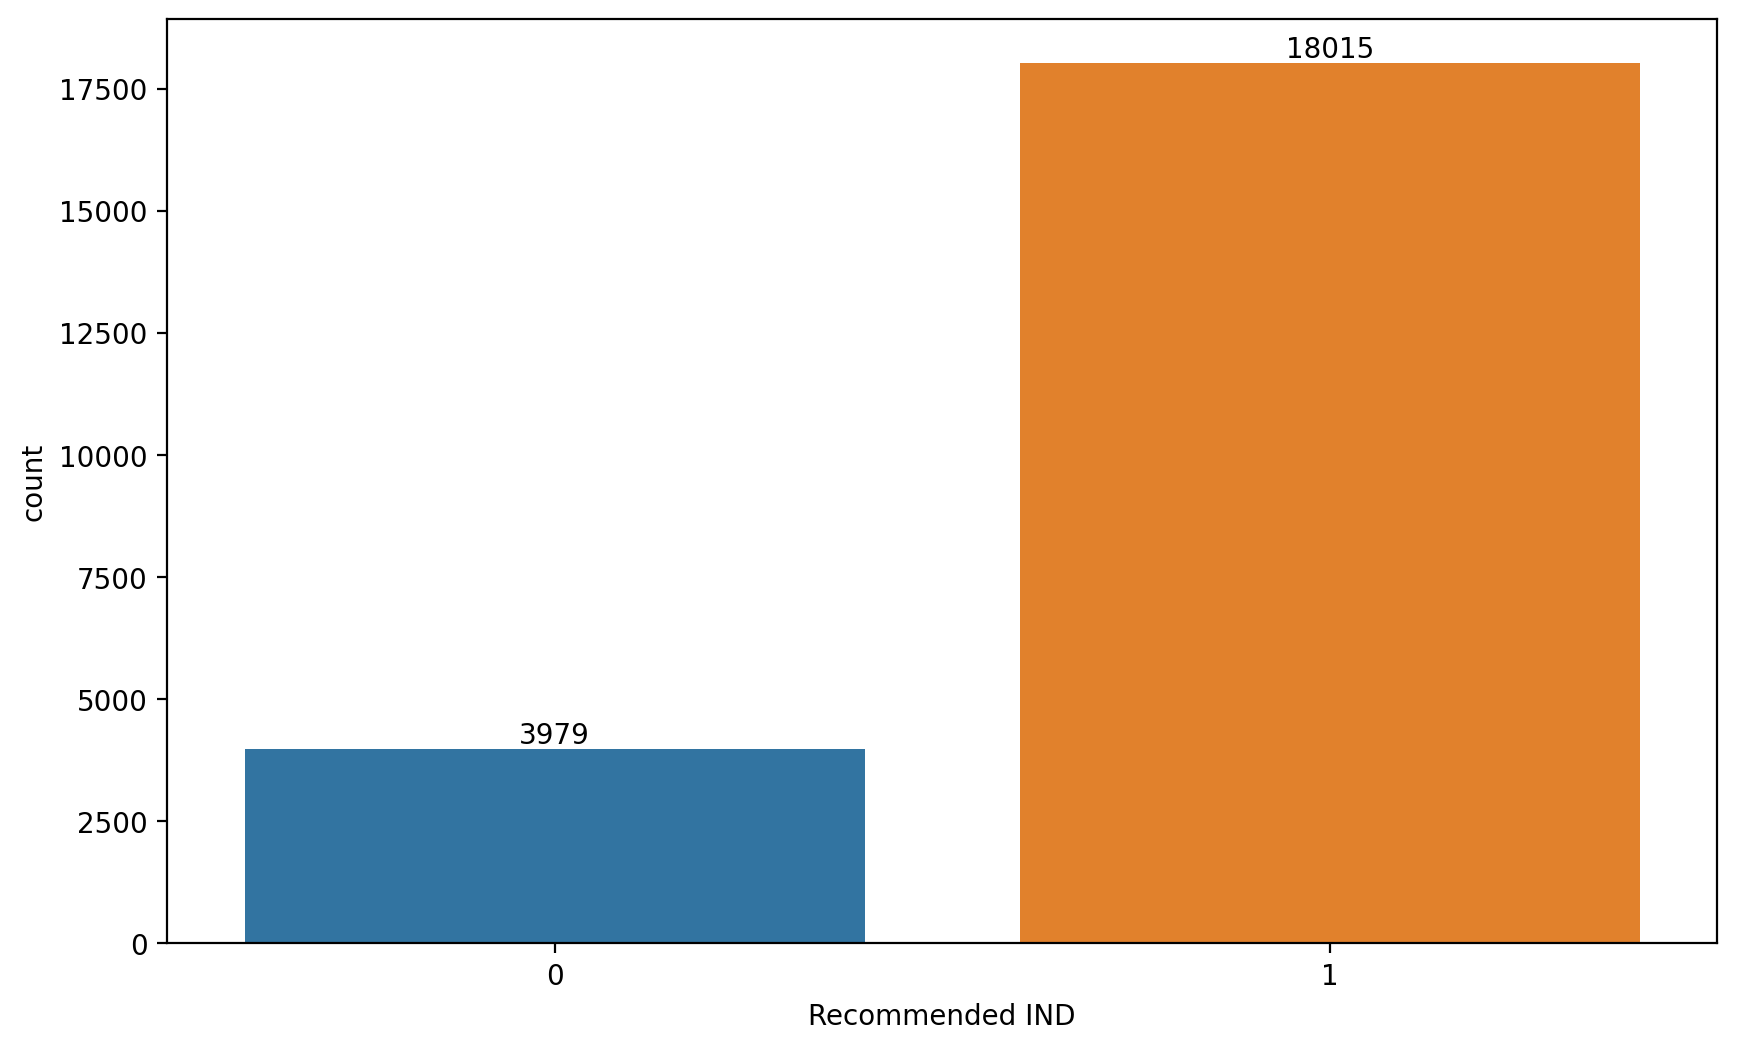

In [12]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="Recommended IND", data=df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [13]:
# create dataframe with on the two columns: "Review Text" and **"Recommended IND"

In [14]:
df1 = df[["Review Text", "Recommended IND"]]
df1.head()

Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Absolutely wonderful - silky and sexy and comfortable   
1                                                                                                                                                                                                       Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c   
3                                                                                                                                                                                                                                                                                                                                                                                          I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                                                                                                                                                                                                                                      This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Recommended IND  
0                1  
1                1  
2                0  
3                1  
4                1

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21994 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      21175 non-null  object
 1   Recommended IND  21994 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 515.5+ KB


---
---


### Missing Value Detection

In [16]:
df1.isna().sum()

Review Text        819
Recommended IND      0
dtype: int64

In [17]:
#drop all rows that contain missing values and rest the index of the dataframe; drop = True meaning that the current index will be dropped and the new index will be used
df1 = df1.dropna(subset=["Review Text"], axis=0)
df1 = df1.reset_index(drop = True,)

In [18]:
df1.head(5)

Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Absolutely wonderful - silky and sexy and comfortable   
1                                                                                                                                                                                                       Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c   
3                                                                                                                                                                                                                                                                                                                                                                                          I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                                                                                                                                                                                                                                      This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Recommended IND  
0                1  
1                1  
2                0  
3                1  
4                1

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [19]:
#Convert to lower case

df1['Review Text'] = df1['Review Text'].str.lower()
df1['Review Text'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                   absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                         love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is tr

In [20]:
stop_words = stopwords.words('english')


In [21]:
"not" in stop_words  and "no" in stop_words 

True

In [22]:
def cleaning(data):

    import re
    
    #1. Contractions Expension & Tokenize: used to tokenize the given text creating a list of lowercase words from the input text 
    text_tokens = word_tokenize(data.replace("'", '').lower())

    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words ]
    
    #4. lemma
    text_cleaned  = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [23]:
# code tokenize the text in the 'Review Text' column of the dataframe df1 and store the tokenized text in a new column called 'Tokenized'.
# The apply() function is used to apply the cleaning() function to each row of the 'Review Text' column. 
# The lambda function is used to pass the value of the 'Review Text' column for each row to the cleaning() function. 
# The axis=1 parameter specifies that we want to apply the function to each row (axis=1) of the 'Review Text' column.

df1['Tokenized'] = df1.apply(lambda x: cleaning(x['Review Text']), axis=1)
df1[['Review Text', 'Tokenized']].head()

Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                 absolutely wonderful - silky and sexy and comfortable   
1                                                                                                                                                                                                       love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.   
2  i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c   
3                                                                                                                                                                                                                                                                                                                                                                                          i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                                                                                                                                                                                                                                      this shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

                                                                                                                                                                                                                                                                                                    Tokenized  
0                                                                                                                                                                                                                                                                 absolutely wonderful silky sexy comfortable  
1                                                                                                                        love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite  
2  high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c  
3                                                                                                                                                                                                                    love love love jumps

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [24]:
df2 = df1[["Tokenized", "Recommended IND"]]
df2.head()

Tokenized  \
0                                                                                                                                                                                                                                                                 absolutely wonderful silky sexy comfortable   
1                                                                                                                        love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite   
2  high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c   
3                                                                                                                                                                                                                    love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment   
4                                                                                                                                                                                              shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt   

   Recommended IND  
0                1  
1                1  
2                0  
3                1  
4                1

In [25]:
df2.sample(6)

Tokenized  \
14289              love unique vest im still figuring wear feminine way lack shape waist collar sometimes doesnt behave think sweater texture make casual could belt wear fancier shoe glam nice third piece keep warm fall winter hopefully wear figure   
13444  coat wonderful boxy drape really nicely color beautiful versitile love pocket fabric sturdy heavy nothing good thing say coat return sadly since wasnt flattering hourglass shape small fit well youre confident enough hide waste go wont regret   
18173           saw tank store glad try got small im x try get petite small fit great longer cut bought green find sheer actually thought thicker tank tee day found arm hole fine usually need go petite reason need time planning getting couple color   
8773                     purchased violet chino local store color plum violet nice shade still fit perfect oh comfortable bought size weight flux see several pair color comfort level work fall spring summer warmer state even winter fabric soft feel   
14775                                                     cute easy wear perfect little top go many thing scalloped shoulder add nice touch im solid pretty large chest think need go sure order see big difference larger chest may want order two size   
12062                                                                                                                                      eye top ever since saw online couldnt happier comfortable flattering unique think wear well fall black skinny   

       Recommended IND  
14289                1  
13444                1  
18173                1  
8773                 1  
14775                1  
12062                1

In [26]:
positive = df2[df2["Recommended IND"]==1]["Tokenized"]
positive.head(3)

0                                                                                                                                             absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
3                                                                                                love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
Name: Tokenized, dtype: object

In [27]:
negative = df2[df2["Recommended IND"]==0]["Tokenized"]
negative.head(3)

2     high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
5                                           love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress
10                                                                                                            dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back
Name: Tokenized, dtype: object

In [28]:
len(positive),len(negative)

(17261, 3914)

### Collect Words (positive and negative separately)

In [29]:
#used to join all the text in the 'Review Text' column of the dataframe positive into a single string
#The join() function is used to join all the text in the 'Tokenized' column of the dataframe positive by separating them with a space, creating a single string of concatenated text.

positive_wds = " ".join(positive)
positive_wds[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose xx kept wil ldecide later since light color already sold

In [30]:
negative_wds = " ".join(negative)
negative_wds[:1000]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath look like described sadly returning im sure find something exchange lo

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [31]:
#%pip install wordcloud
from wordcloud import WordCloud

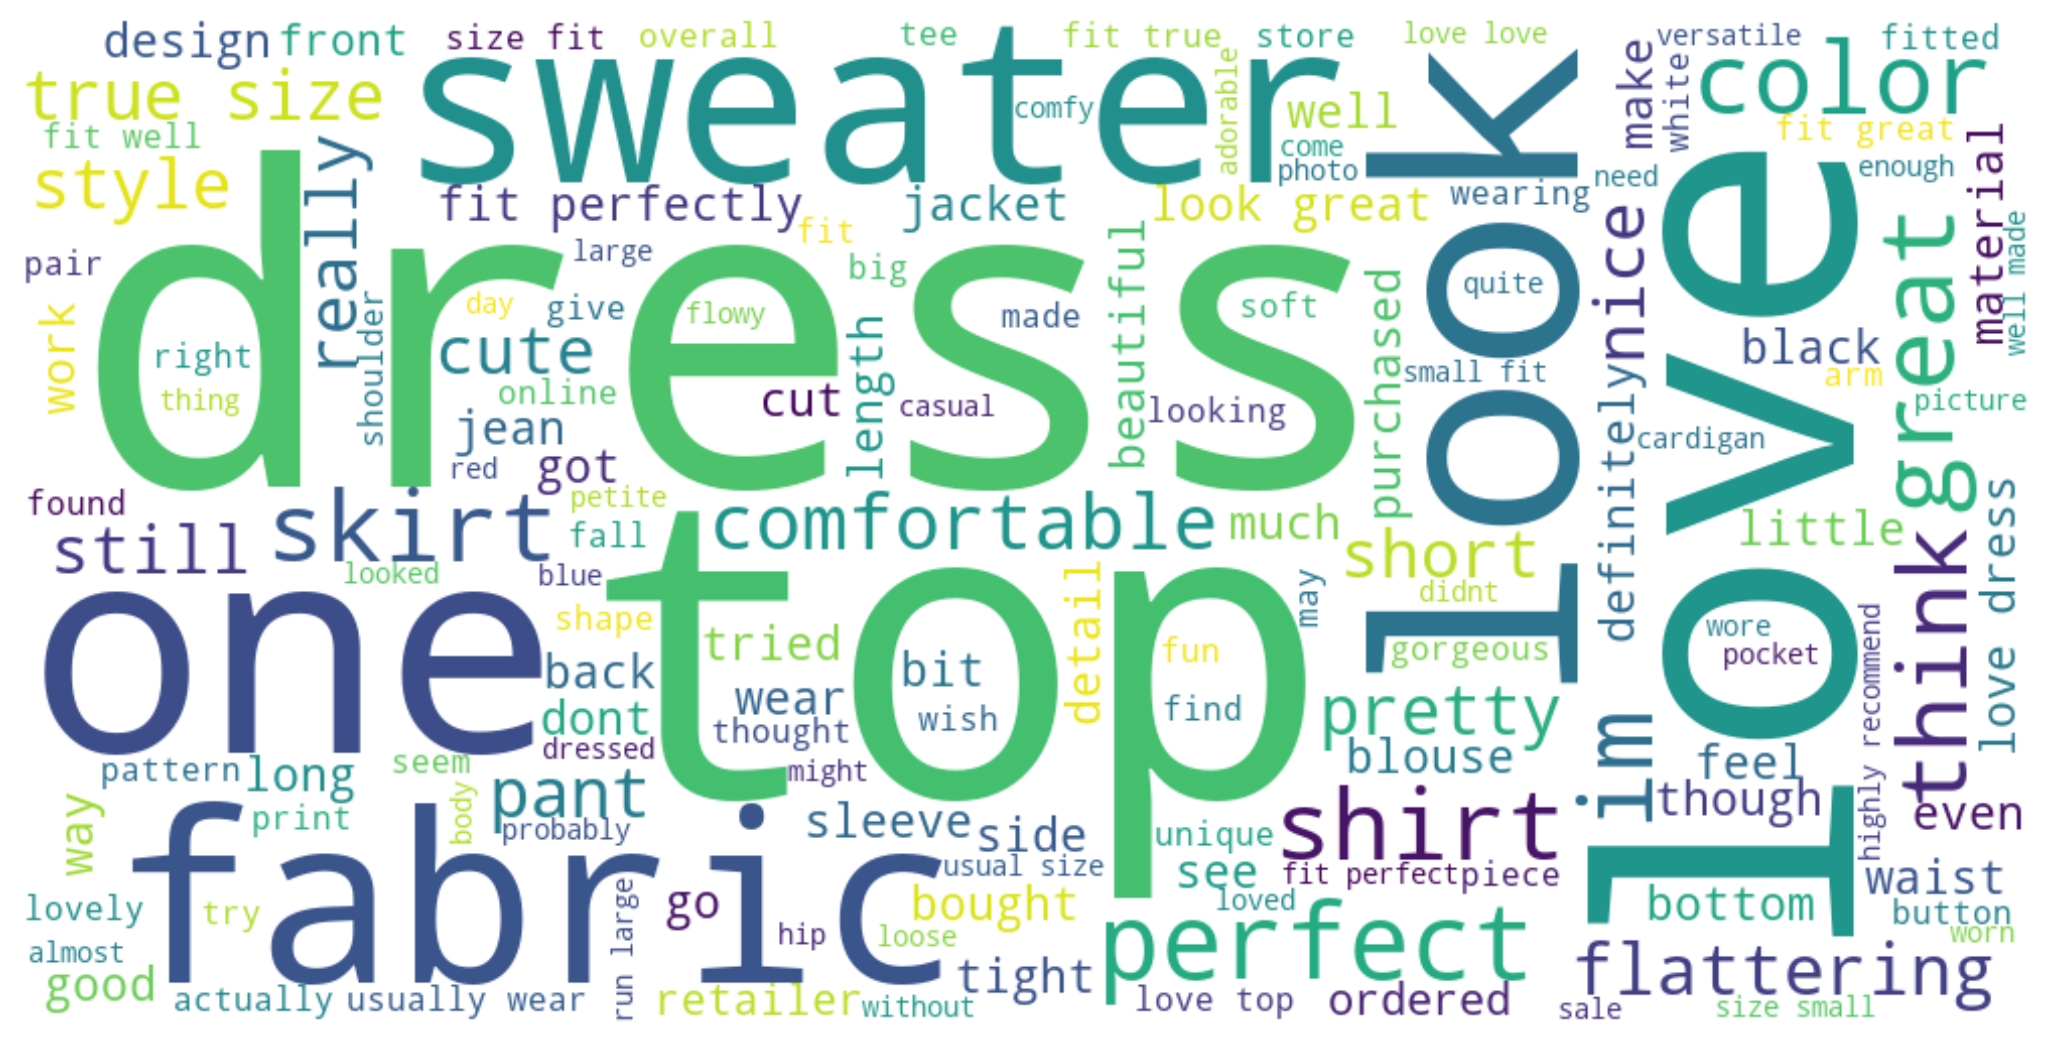

In [32]:
positve_wordcloud = WordCloud(width = 1000, height = 500, background_color ='white',min_font_size = 10, max_words = 300).generate(positive_wds)

plt.figure(figsize = (13, 13))
plt.imshow(positve_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

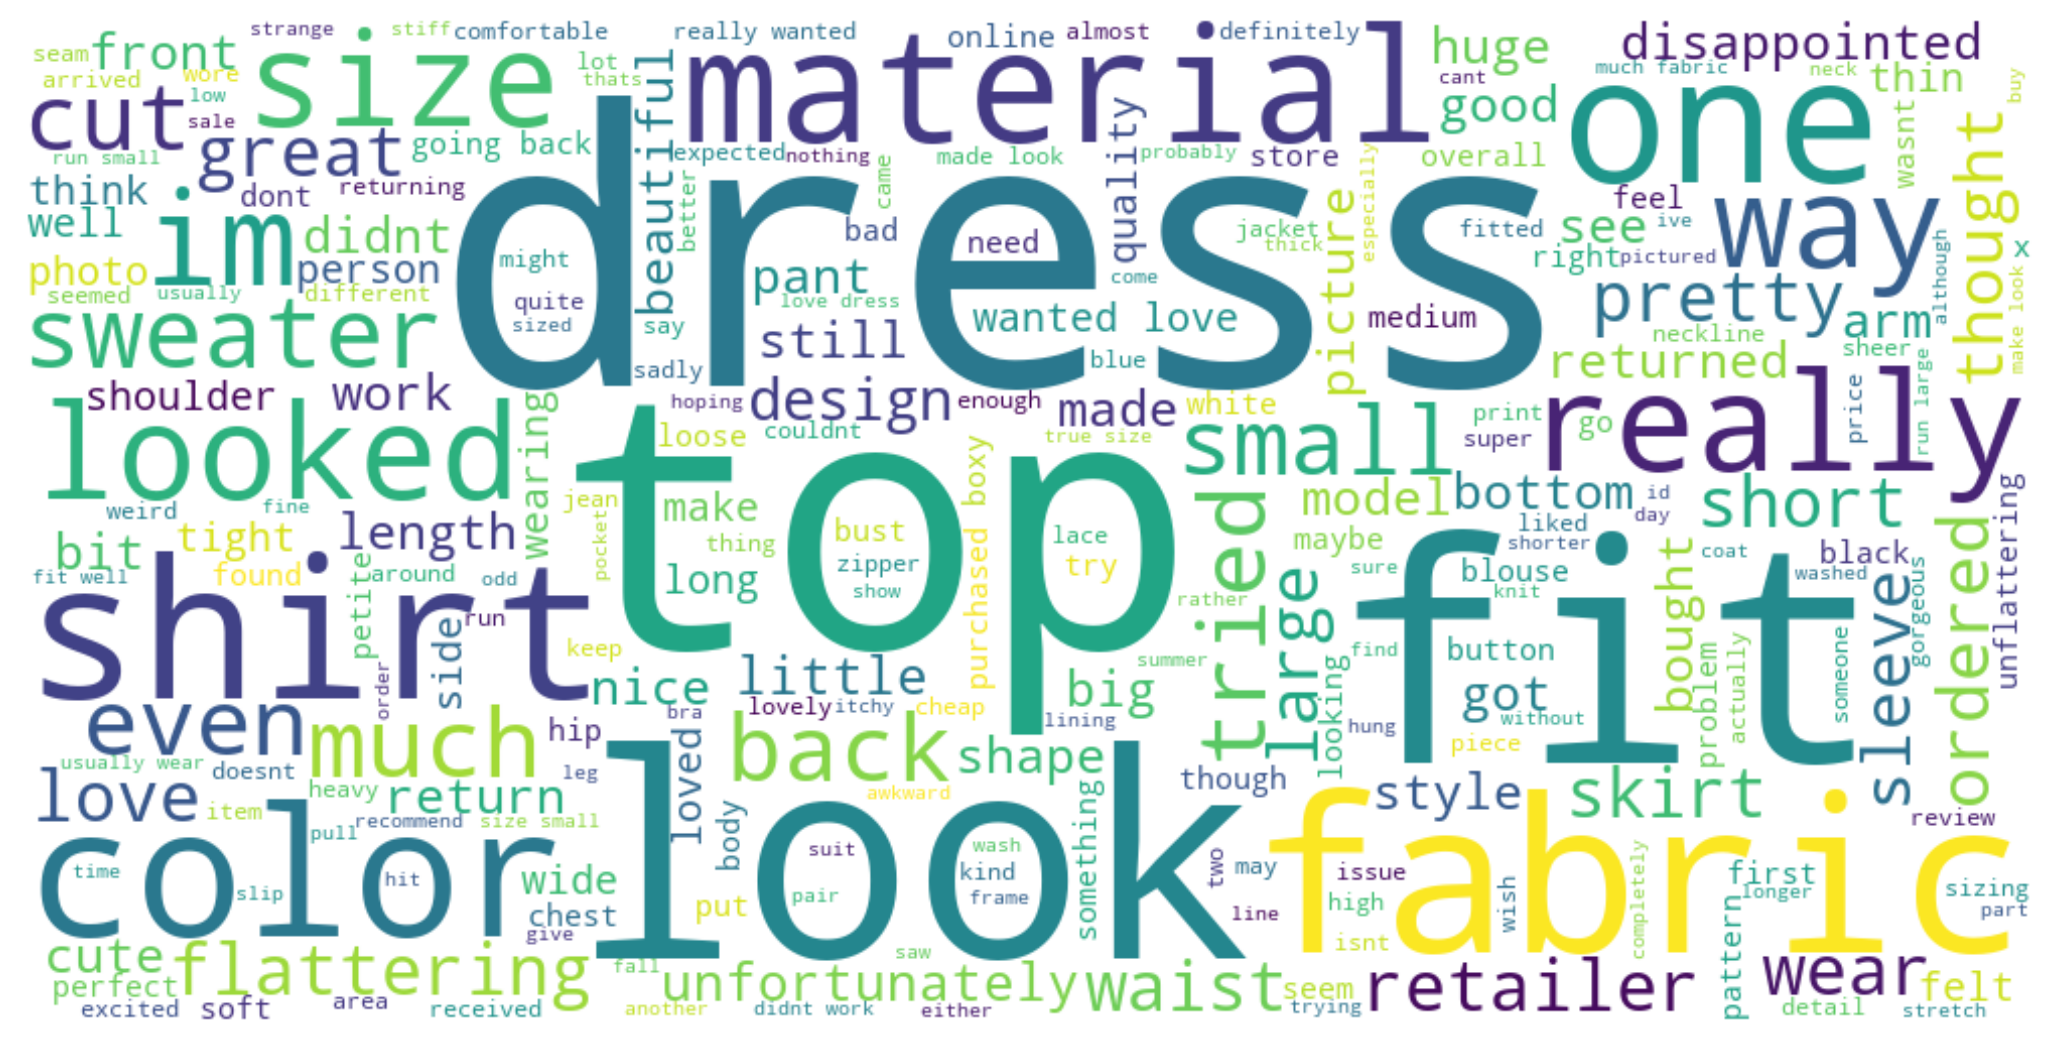

In [33]:
negative_wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10, max_words = 300).generate(negative_wds)

plt.figure(figsize = (13, 13))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df2.columns

Index(['Tokenized', 'Recommended IND'], dtype='object')

In [36]:
X = df2['Tokenized']
y = df2['Recommended IND']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=2)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [40]:
type(X_train_count)

scipy.sparse._csr.csr_matrix

In [41]:
# The toarray() method is used to convert the sparse matrix X_train_count into a dense numpy array, 
# where all the cells of the matrix are stored in memory, including the zeros.

X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
vectorizer.get_feature_names_out()[:20]

array(['aa', 'ab', 'abbey', 'abby', 'abdomen', 'ability', 'able',
       'abnormally', 'abo', 'abou', 'abroad', 'absolute', 'absolutely',
       'absolutley', 'absolutly', 'abstract', 'absurd', 'abt',
       'abundance', 'ac'], dtype=object)

In [43]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

aa  ab  abbey  abby  abdomen  ability  able  abnormally  abo  abou  \
0       0   0      0     0        0        0     0           0    0     0   
1       0   0      0     0        0        0     0           0    0     0   
2       0   0      0     0        0        0     0           0    0     0   
3       0   0      0     0        0        0     0           0    0     0   
4       0   0      0     0        0        0     0           0    0     0   
...    ..  ..    ...   ...      ...      ...   ...         ...  ...   ...   
16935   0   0      0     0        0        0     0           0    0     0   
16936   0   0      0     0        0        0     0           0    0     0   
16937   0   0      0     0        0        0     1           0    0     0   
16938   0   0      0     0        0        0     0           0    0     0   
16939   0   0      0     0        0        0     0           0    0     0   

       abroad  absolute  absolutely  absolutley  absolutly  abstract  absurd  \
0           0         0           0           0          0         0       0   
1           0         0           0           0          0         0       0   
2           0         0           0           0          0         0       0   
3           0         0           0           0          0         0       0   
4           0         0           0           0          0         0       0   
...       ...       ...         ...         ...        ...       ...     ...   
16935       0         0           0           0          0         0       0   
16936       0         0           0           0          0         0       0   
16937       0         0           0           0          0         0       0   
16938       0         0           0           0          0         0       0   
16939       0         0           0           0          0         0       0   

       abt  abundance  ac  accent  accented  accentuate  accentuated  \
0        0          0   0       0         0           0            0   
1        0          0   0       0         0           0            0   
2        0          0   0       0         0           0            0   
3        0          0   0       0         0           0            0   
4        0          0   0       0         0           0            0   
...    ...        ...  ..     ...       ...         ...          ...   
16935    0          0   0       0         0           0            0   
16936    0          0   0       0         0           0            0   
16937    0          0   0       0         0           0            0   
16938    0          0   0       0         0           0            0   
16939    0          0   0       0         0           0            0   

       accentuates  ...  youd  youll  young  younger  youre  youth  youthful  \
0                0  ...     0      0      0        0      0      0         0   
1                0  ...     0      0      0        0      0      0         0   
2                0  ...     0      0      0        0      0      0         0   
3                0  ...     0      0      0        0      0      0         0   
4                0  ...     0      0      0        0      0      0         0   
...            ...  ...   ...    ...    ...      ...    ...    ...       ...   
16935            0  ...     0      0      0        0      0      0         0   
16936            0  ...     0      0      0        0      0      0         0   
16937            0  ...     0      0      0        0      0      0         0   
16938            0  ...     0      0      0        0      0      0         0   
16939            0  ...     0      0      0        0      0      0         0   

       youve  yr  yuck  yucky  yummy  yup  zag  zero  zig  zigzag  zillion  \
0          0   0     0      0      0    0    0     0    0       0        0   
1          0   0     0      0      0    0    0     0    0       0        0   
2          0   0     0      0      0    0    0     0    0    

### TF-IDF

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
tf_idf_vec= TfidfVectorizer()
X_train_tf_idf = tf_idf_vec.fit_transform(X_train)
X_test_tf_idf = tf_idf_vec.transform(X_test)

In [46]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vec.get_feature_names_out())

aa  aaaaaaamazing  aaaaandidontwanttopayforshipping  aaaaannnnnnd  \
0      0.0            0.0                               0.0           0.0   
1      0.0            0.0                               0.0           0.0   
2      0.0            0.0                               0.0           0.0   
3      0.0            0.0                               0.0           0.0   
4      0.0            0.0                               0.0           0.0   
...    ...            ...                               ...           ...   
16935  0.0            0.0                               0.0           0.0   
16936  0.0            0.0                               0.0           0.0   
16937  0.0            0.0                               0.0           0.0   
16938  0.0            0.0                               0.0           0.0   
16939  0.0            0.0                               0.0           0.0   

       aaaahs  aaahed  aame   ab  abbey  abby  abck  abdomen  abhor  ability  \
0         0.0     0.0   0.0  0.0    0.0   0.0   0.0      0.0    0.0      0.0   
1         0.0     0.0   0.0  0.0    0.0   0.0   0.0      0.0    0.0      0.0   
2         0.0     0.0   0.0  0.0    0.0   0.0   0.0      0.0    0.0      0.0   
3         0.0     0.0   0.0  0.0    0.0   0.0   0.0      0.0    0.0      0.0   
4         0.0     0.0   0.0  0.0    0.0   0.0   0.0      0.0    0.0      0.0   
...       ...     ...   ...  ...    ...   ...   ...      ...    ...      ...   
16935     0.0     0.0   0.0  0.0    0.0   0.0   0.0      0.0    0.0      0.0   
16936     0.0     0.0   0.0  0.0    0.0   0.0   0.0      0.0    0.0      0.0   
16937     0.0     0.0   0.0  0.0    0.0   0.0   0.0      0.0    0.0      0.0   
16938     0.0     0.0   0.0  0.0    0.0   0.0   0.0      0.0    0.0      0.0   
16939     0.0     0.0   0.0  0.0    0.0   0.0   0.0      0.0    0.0      0.0   

           able  abnormal  abnormally  abo  abolutely  abou  abroad  abruptly  \
0      0.000000       0.0         0.0  0.0        0.0   0.0     0.0       0.0   
1      0.000000       0.0         0.0  0.0        0.0   0.0     0.0       0.0   
2      0.000000       0.0         0.0  0.0        0.0   0.0     0.0       0.0   
3      0.000000       0.0         0.0  0.0        0.0   0.0     0.0       0.0   
4      0.000000       0.0         0.0  0.0        0.0   0.0     0.0       0.0   
...         ...       ...         ...  ...        ...   ...     ...       ...   
16935  0.000000       0.0         0.0  0.0        0.0   0.0     0.0       0.0   
16936  0.000000       0.0         0.0  0.0        0.0   0.0     0.0       0.0   
16937  0.240145       0.0         0.0  0.0        0.0   0.0     0.0       0.0   
16938  0.000000       0.0         0.0  0.0        0.0   0.0     0.0       0.0   
16939  0.000000       0.0         0.0  0.0        0.0   0.0     0.0       0.0   

       absence  abso  absolute  ...  yucky  yuk  yummy  yup  zag  zara  zed  \
0          0.0   0.0       0.0  ...    0.0  0.0    0.0  0.0  0.0   0.0  0.0   
1          0.0   0.0       0.0  ...    0.0  0.0    0.0  0.0  0.0   0.0  0.0   
2          0.0   0.0       0.0  ...    0.0  0.0    0.0  0.0  0.0   0.0  0.0   
3          0.0   0.0       0.0  ...    0.0  0.0    0.0  0.0  0.0   0.0  0.0   
4          0.0   0.0       0.0  ...    0.0  0.0    0.0  0.0  0.0   0.0  0.0   
...        ...   ...       ...  ...    ...  ...    ...  ...  ...   ...  ...   
16935      0.0   0.0       0.0  ...    0.0  0.0    0.0  0.0  0.0   0.0  0.0   
16936      0.0   0.0       0.0  ...    0.0  0.0    0.0  0.0  0.0   0.0  0.0   
16937      0.0   0.0       0.0  ...    0.0  0.0    0.0  0.0  0.0   0.0  0.0   
16938      0.0   0.0       0.0  ...    0.0  0.0    0.0  0.0  0.0   0.0  0.0   
16939      0.0   0.0       0.0  ...    0.0  0.0    0.0  0.0  0.0   0.0  0.0   

       zermatt  zero  zig  zigzag  zigzagging  zillion  zip  zipepr  zipped  \
0          0.0   0.0  0.0     0.0         0.0      0.0  0.0     0.0     0.0   
1          0.0   0.0  0.0     0.0         

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [49]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [50]:
def eval2(model, X_test):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    
    
    fig, ax = plt.subplots(figsize=(7, 7))
    confusion_matrix(model, X_test, y_test, ax = ax)

## Logistic Regression

### CountVectorizer

In [51]:
from sklearn.linear_model import LogisticRegression

# "C" is the inverse of regularization strength, smaller values specify stronger regularization.
# max_iter is the maximum number of iterations taken for the solvers to converge
# class_weight is set to "balanced" to adjust the weighting for each class to account for imbalanced classes in the dataset.
# random_state is set to 101 to ensure reproducibility of the results.

log = LogisticRegression(C = 0.001, max_iter=1000, class_weight= "balanced", random_state=101) 
log.fit(X_train_count,y_train)

LogisticRegression(C=0.001, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [52]:
eval(log, X_train_count, X_test_count)

[[ 672  111]
 [ 635 2817]]
Test_Set
              precision    recall  f1-score   support

           0       0.51      0.86      0.64       783
           1       0.96      0.82      0.88      3452

    accuracy                           0.82      4235
   macro avg       0.74      0.84      0.76      4235
weighted avg       0.88      0.82      0.84      4235

Train_Set
              precision    recall  f1-score   support

           0       0.54      0.85      0.66      3131
           1       0.96      0.83      0.89     13809

    accuracy                           0.84     16940
   macro avg       0.75      0.84      0.78     16940
weighted avg       0.88      0.84      0.85     16940



In [53]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C = 0.001, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.829162
train_accuracy     0.834816
test_f1            0.887461
train_f1           0.891260
test_recall        0.826707
train_recall       0.830441
test_precision     0.957991
train_precision    0.961693
dtype: float64

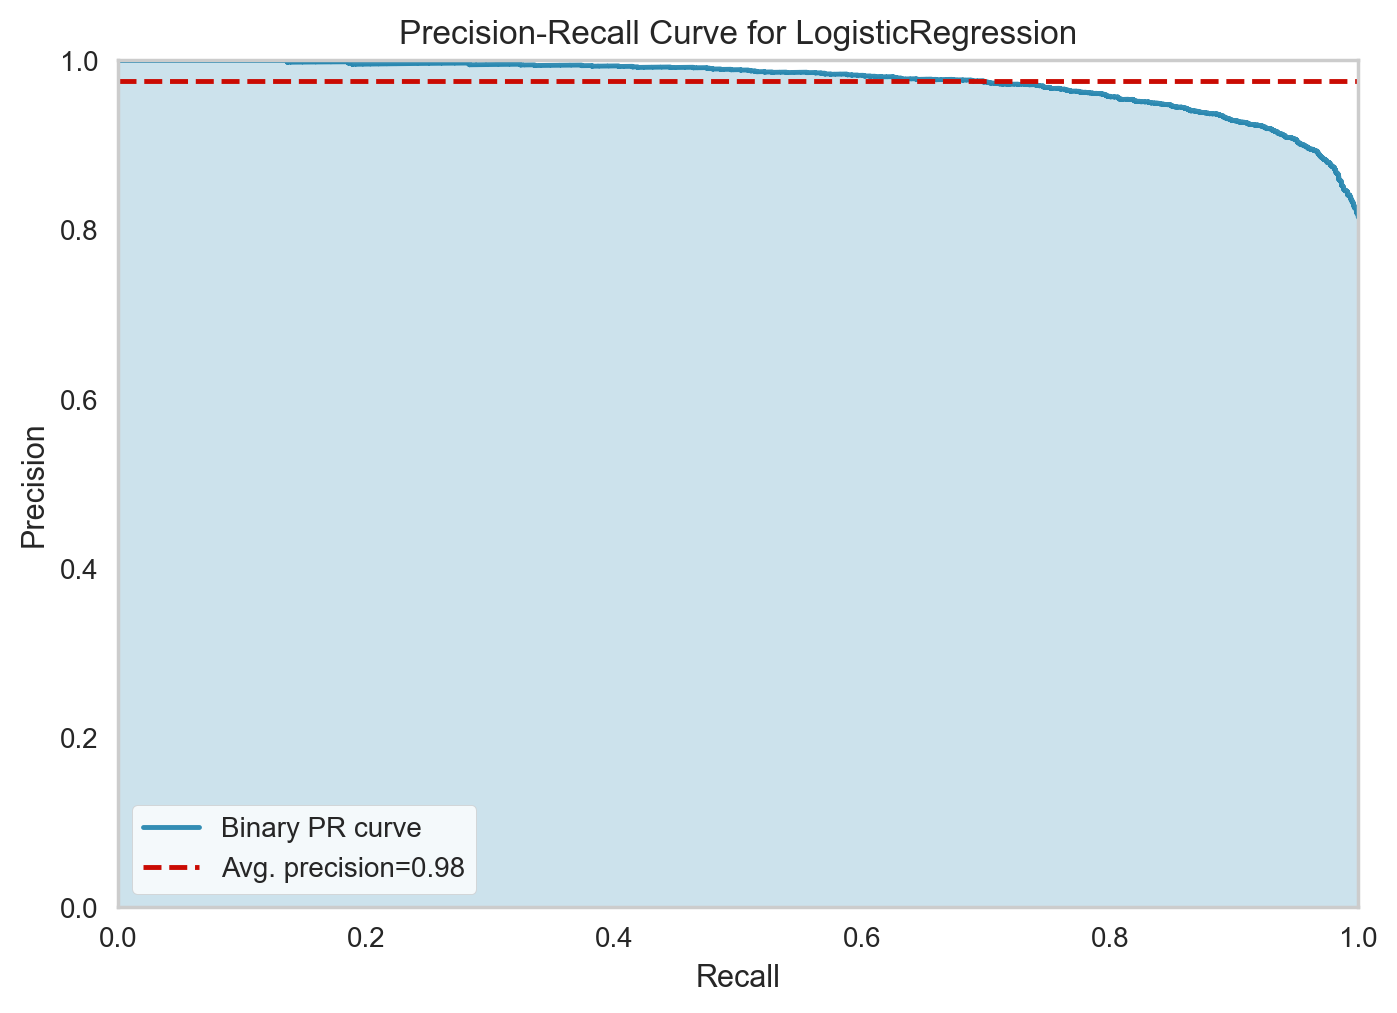

In [54]:
# The code below is creating an instance of the PrecisionRecallCurve class from the yellowbrick library. 
# This class is a visualization tool for displaying the precision-recall curve of a binary classifier.
# The precision-recall curve is a plot of the true positive rate (recall) against the positive predictive value (precision) for different threshold settings of a classifier.

from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C =0.001, max_iter=1000), class_weight= "balanced", random_state=101)

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [55]:
viz.score_

0.9753766827523194

In [56]:
y_pred = log.predict(X_test_count)
log_count_AP = viz.score_
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [57]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [58]:
eval(log, X_train_tf_idf, X_test_tf_idf)

[[ 704   79]
 [ 442 3010]]
Test_Set
              precision    recall  f1-score   support

           0       0.61      0.90      0.73       783
           1       0.97      0.87      0.92      3452

    accuracy                           0.88      4235
   macro avg       0.79      0.89      0.83      4235
weighted avg       0.91      0.88      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.62      0.90      0.73      3131
           1       0.97      0.87      0.92     13809

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [59]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

model = LogisticRegression(C = 0.1, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.884888
train_accuracy     0.915479
test_f1            0.926745
train_f1           0.946140
test_recall        0.893331
train_recall       0.910702
test_precision     0.962808
train_precision    0.984448
dtype: float64

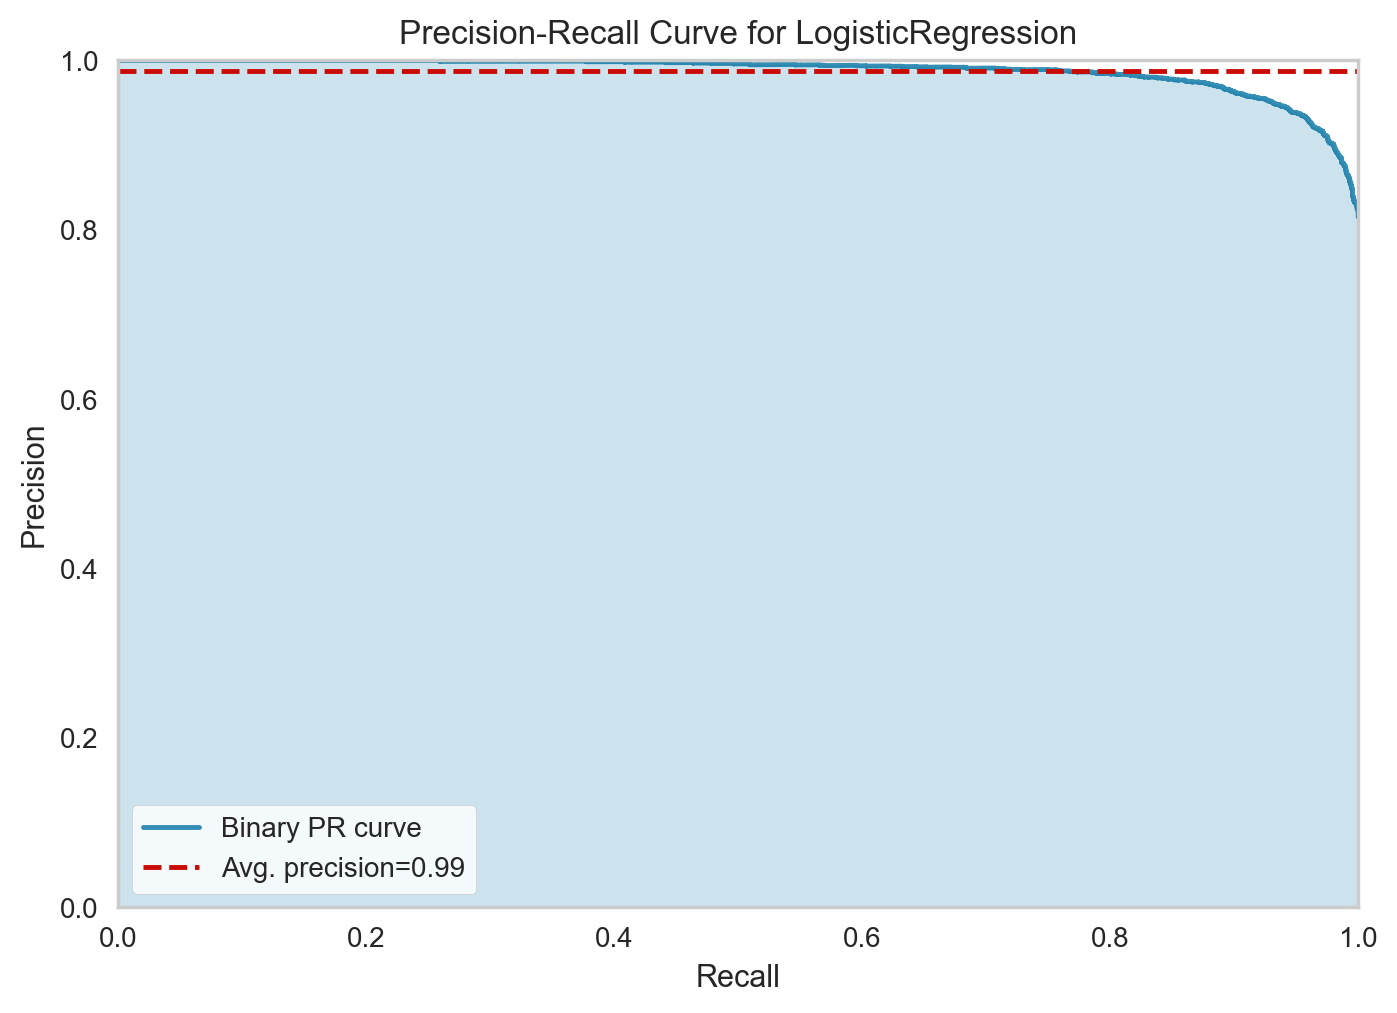

In [60]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced"))
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [61]:
viz.score_

0.9874211950736171

In [62]:
y_pred = log.predict(X_test_tf_idf)
log_tf_idf_rec = recall_score(y_test, y_pred)
log_tf_idf_f1 = f1_score(y_test, y_pred)
log_tf_idf_AP = viz.score_

## Naive Bayes 

### Countvectorizer

In [63]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [64]:
# The alpha parameter in the MultinomialNB classifier controls the strength of Laplace smoothing, which is used to prevent zero probabilities in the model. 
# In a confusion matrix, recall is the measure of the proportion of actual positive instances that are correctly classified as positive by the model.

# Increasing the alpha value in the MultinomialNB classifier will increase the strength of Laplace smoothing, 
# which can lead to a decrease in the number of false negatives (i.e. actual positive instances that are classified as negative by the model) in the confusion matrix. 
# This will result in an increase in the recall value. 
# Conversely, decreasing the alpha value will decrease the strength of Laplace smoothing, which can lead to an increase in the number of false negatives in the confusion matrix and a decrease in the recall value.

nb = MultinomialNB(alpha=5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=5)

In [65]:
eval(nb, X_train_count, X_test_count)

[[ 445  338]
 [  66 3386]]
Test_Set
              precision    recall  f1-score   support

           0       0.87      0.57      0.69       783
           1       0.91      0.98      0.94      3452

    accuracy                           0.90      4235
   macro avg       0.89      0.77      0.82      4235
weighted avg       0.90      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.85      0.62      0.72      3131
           1       0.92      0.97      0.95     13809

    accuracy                           0.91     16940
   macro avg       0.88      0.80      0.83     16940
weighted avg       0.91      0.91      0.90     16940



In [66]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

model = MultinomialNB(alpha=5)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.892385
train_accuracy     0.907530
test_f1            0.936535
train_f1           0.945251
test_recall        0.974003
train_recall       0.979249
test_precision     0.901884
train_precision    0.913535
dtype: float64

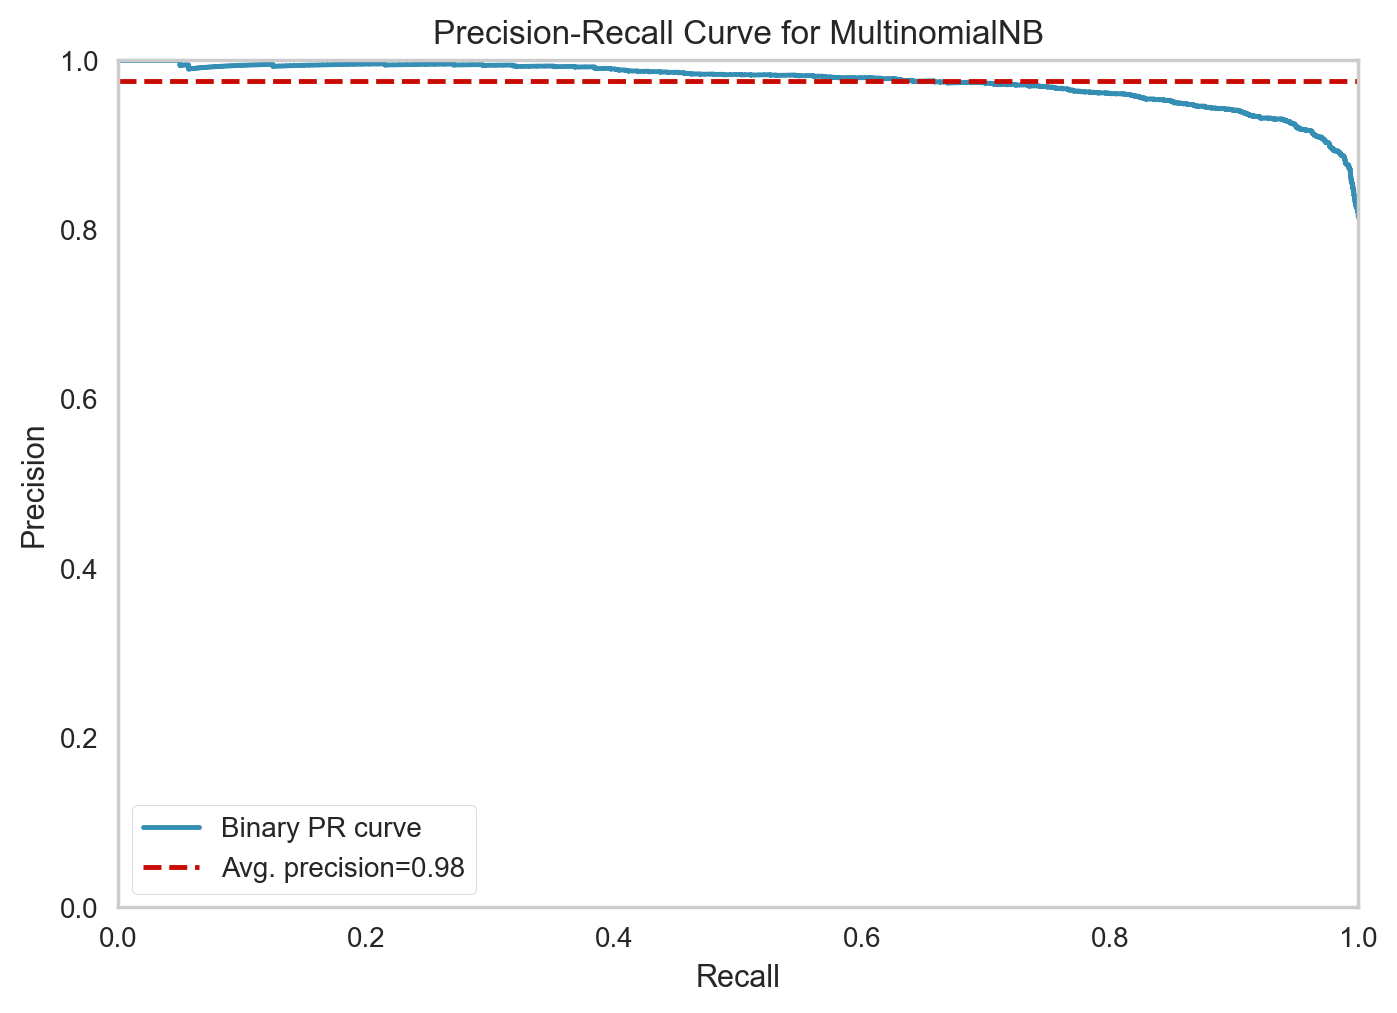

In [67]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(MultinomialNB(alpha=10), classes=nb.classes_, per_class=True, cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [68]:
y_pred = nb.predict(X_test_count)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test, y_pred)
nb_count_AP = viz.score_

### TF-IDF

In [69]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [70]:
nb = MultinomialNB(alpha=5)
nb.fit(X_train_tf_idf, y_train)

MultinomialNB(alpha=5)

In [71]:
eval(nb, X_train_tf_idf, X_test_tf_idf)

[[   0  783]
 [   0 3452]]
Test_Set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       783
           1       0.82      1.00      0.90      3452

    accuracy                           0.82      4235
   macro avg       0.41      0.50      0.45      4235
weighted avg       0.66      0.82      0.73      4235

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      3131
           1       0.82      1.00      0.90     13809

    accuracy                           0.82     16940
   macro avg       0.91      0.50      0.45     16940
weighted avg       0.85      0.82      0.73     16940



In [72]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

model = MultinomialNB(alpha=5)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.815230
train_accuracy     0.815230
test_f1            0.898205
train_f1           0.898205
test_recall        1.000000
train_recall       1.000000
test_precision     0.815219
train_precision    0.815219
dtype: float64

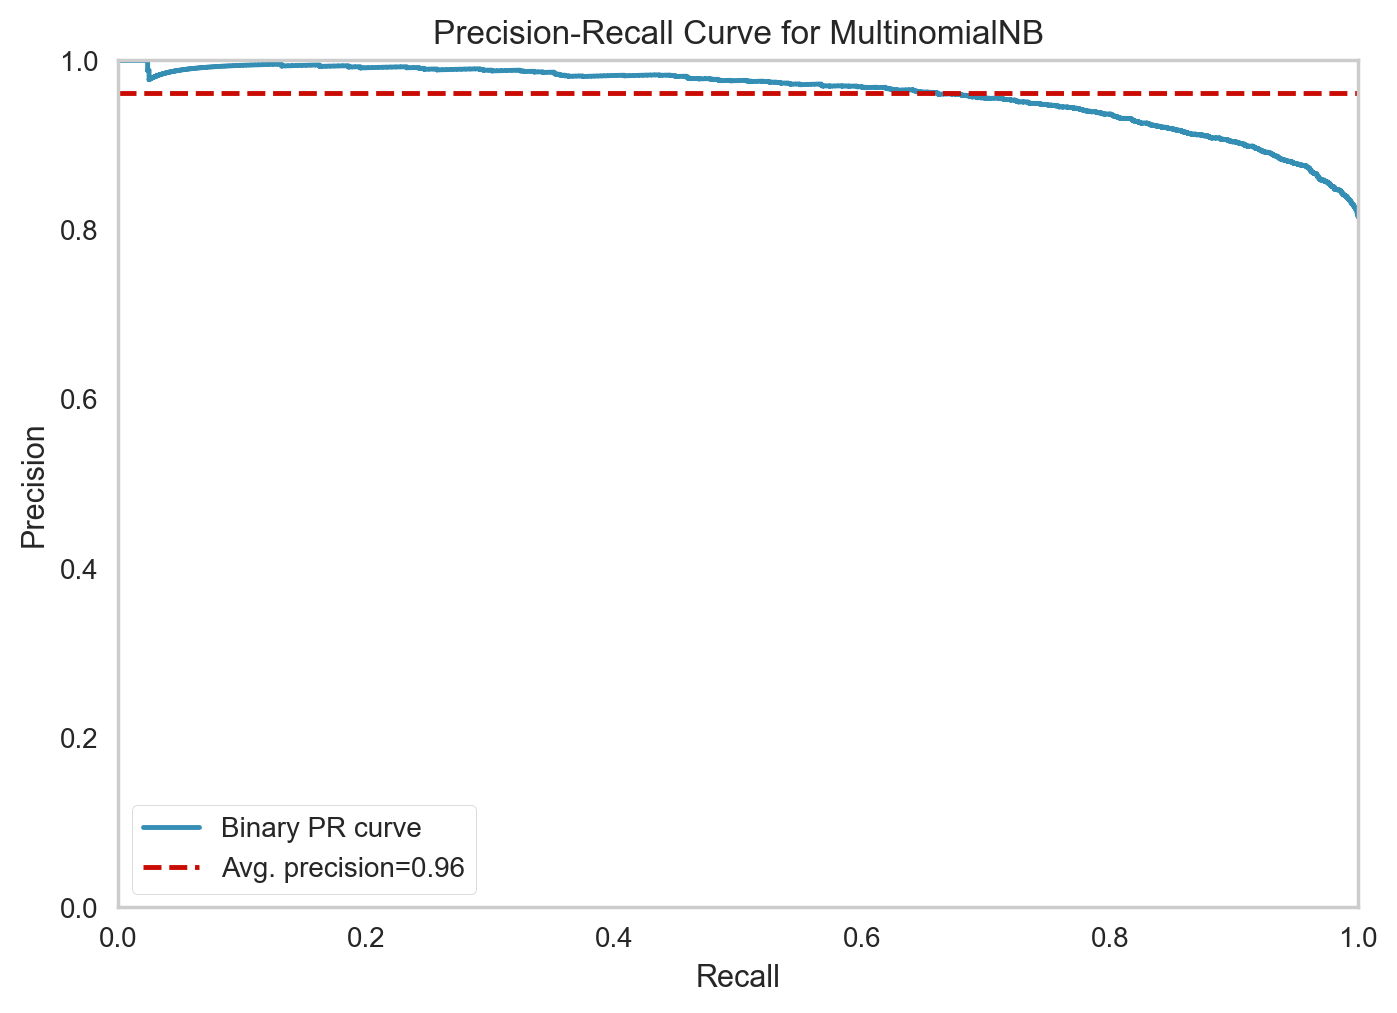

In [73]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(MultinomialNB(alpha=10), classes=nb.classes_, per_class=True, cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [74]:
y_pred = nb.predict(X_test_tf_idf)
nb_tf_idf_rec = recall_score(y_test, y_pred)
nb_tf_idf_f1= f1_score(y_test, y_pred)
nb_tf_idf_AP = viz.score_

## Support Vector Machine (SVM)

### Countvectorizer

In [75]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.0005, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.0005, class_weight='balanced', random_state=101)

In [76]:
eval(svc, X_train_count, X_test_count)

[[ 686   97]
 [ 480 2972]]
Test_Set
              precision    recall  f1-score   support

           0       0.59      0.88      0.70       783
           1       0.97      0.86      0.91      3452

    accuracy                           0.86      4235
   macro avg       0.78      0.87      0.81      4235
weighted avg       0.90      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.60      0.88      0.71      3131
           1       0.97      0.87      0.92     13809

    accuracy                           0.87     16940
   macro avg       0.78      0.87      0.81     16940
weighted avg       0.90      0.87      0.88     16940



In [77]:
model = LinearSVC(C=0.0005, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.858442
train_accuracy     0.868254
test_f1            0.908301
train_f1           0.914589
test_recall        0.860236
train_recall       0.865313
test_precision     0.962132
train_precision    0.969817
dtype: float64

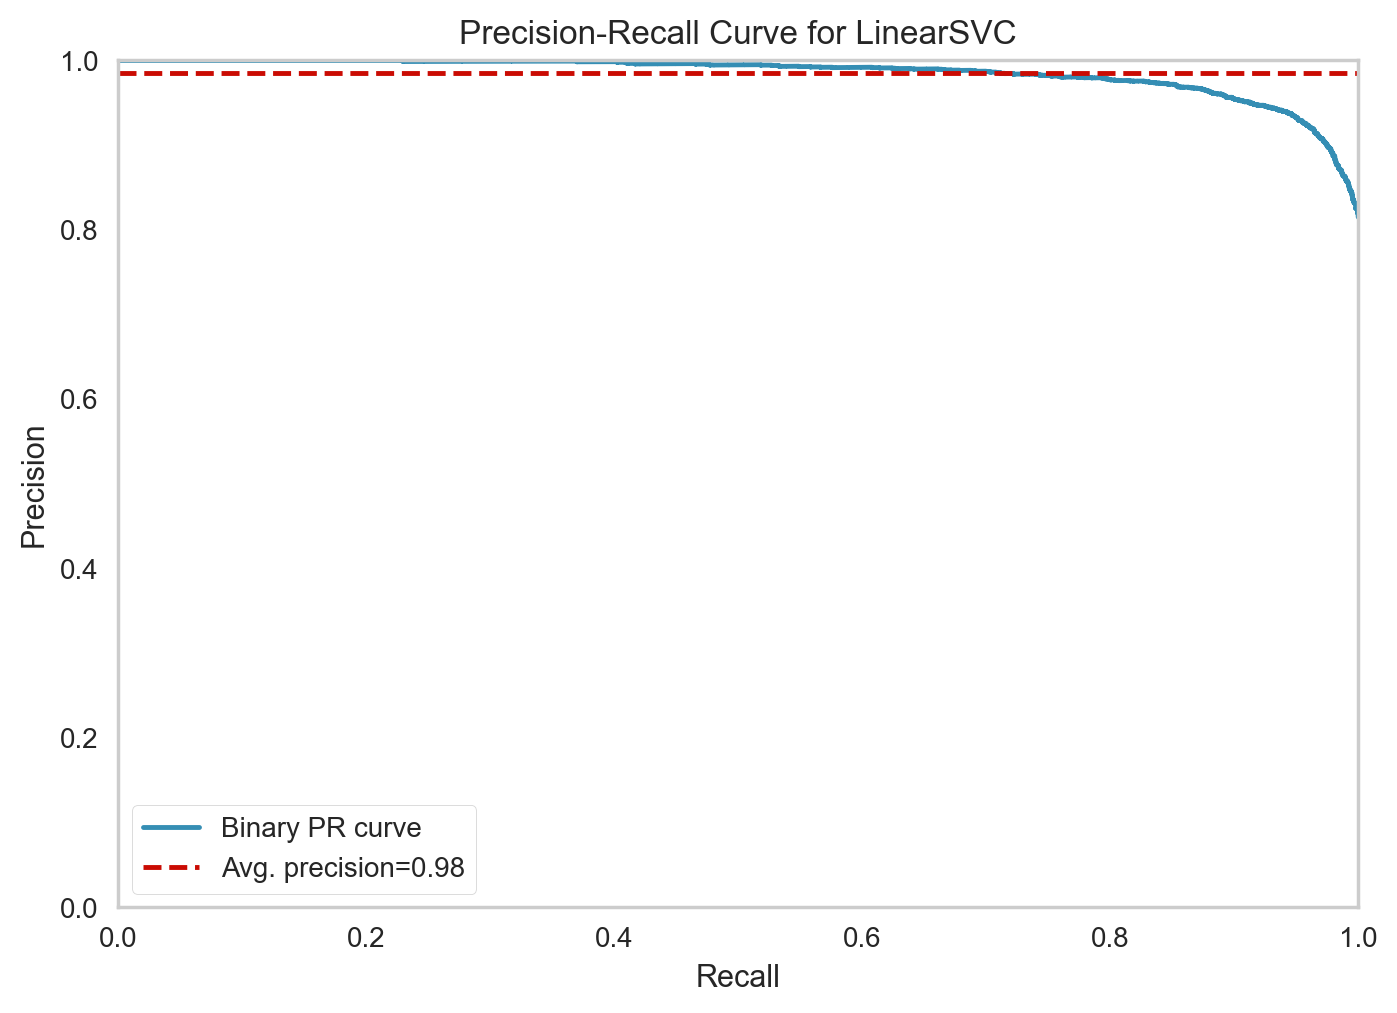

In [78]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(LinearSVC(C=0.0005, class_weight="balanced", random_state=101), classes=svc.classes_, per_class=True, cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [79]:
y_pred = svc.predict(X_test_count)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)
svc_count_AP = viz.score_

### TD-IDF

In [80]:
# parameter "C" represents the regularization strength. 
# It controls the trade-off between maximizing the margin (the distance between the decision boundary and the closest data points)and minimizing the misclassification errors. 
# A smaller value of C will result in a larger margin, but may also result in more misclassifications. 
# A larger value of C will result in a smaller margin, but may also result in fewer misclassifications.
# C is the inverse of regularization strength; smaller C means stronger regularization.

svc = LinearSVC(C=0.0005, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf, y_train)

LinearSVC(C=0.0005, class_weight='balanced', random_state=101)

In [81]:
eval(svc, X_train_tf_idf, X_test_tf_idf)

[[ 687   96]
 [ 581 2871]]
Test_Set
              precision    recall  f1-score   support

           0       0.54      0.88      0.67       783
           1       0.97      0.83      0.89      3452

    accuracy                           0.84      4235
   macro avg       0.75      0.85      0.78      4235
weighted avg       0.89      0.84      0.85      4235

Train_Set
              precision    recall  f1-score   support

           0       0.56      0.88      0.68      3131
           1       0.97      0.84      0.90     13809

    accuracy                           0.85     16940
   macro avg       0.76      0.86      0.79     16940
weighted avg       0.89      0.85      0.86     16940



In [82]:
model = LinearSVC(C=0.0005, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.844628
train_accuracy     0.851069
test_f1            0.898256
train_f1           0.902478
test_recall        0.841770
train_recall       0.845359
test_precision     0.963034
train_precision    0.967876
dtype: float64

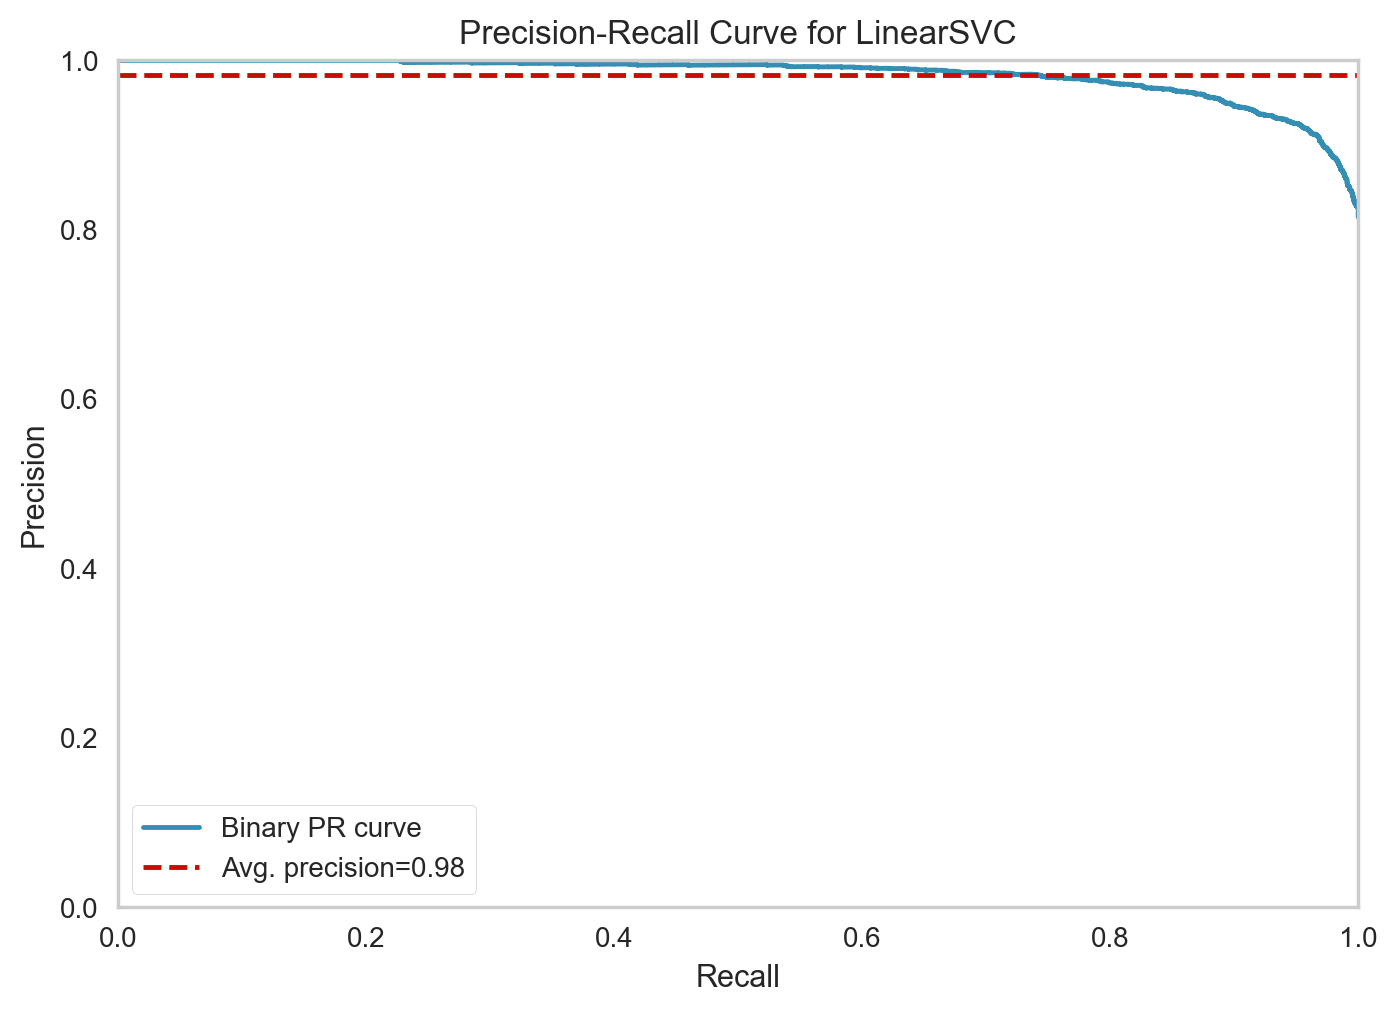

In [83]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(LinearSVC(C=0.0005, class_weight="balanced", random_state=101), classes=svc.classes_, per_class=True, cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [84]:
y_pred = svc.predict(X_test_tf_idf)
svc_tf_id_rec = recall_score(y_test, y_pred)
svc_tf_id__f1 = f1_score(y_test,y_pred)
svc_tf_id__AP = viz.score_

## Random Forest

### Countvectorizer

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=101)

In [86]:
# n_estimators = 200 : This parameter represents the number of trees in the forest.
# random_state = 101 : This parameter sets the random seed for the classifier, which helps to ensure reproducibility of the model.
# n_jobs = -1 : This parametertells the classifier to use all available CPU cores when fitting and predicting, which can speed up the training process.
# class_weight = "balanced" : This parameter tells the classifier to adjust the weight of each class inversely proportional to its frequency in the input data. 
# This can help to mitigate the impact of class imbalance.

In [87]:
eval(rf, X_train_count, X_test_count)

[[ 645  138]
 [ 482 2970]]
Test_Set
              precision    recall  f1-score   support

           0       0.57      0.82      0.68       783
           1       0.96      0.86      0.91      3452

    accuracy                           0.85      4235
   macro avg       0.76      0.84      0.79      4235
weighted avg       0.88      0.85      0.86      4235

Train_Set
              precision    recall  f1-score   support

           0       0.63      0.90      0.74      3131
           1       0.97      0.88      0.93     13809

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [88]:
model = RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.864345
train_accuracy     0.893716
test_f1            0.913418
train_f1           0.932159
test_recall        0.878195
train_recall       0.895889
test_precision     0.951795
train_precision    0.971527
dtype: float64

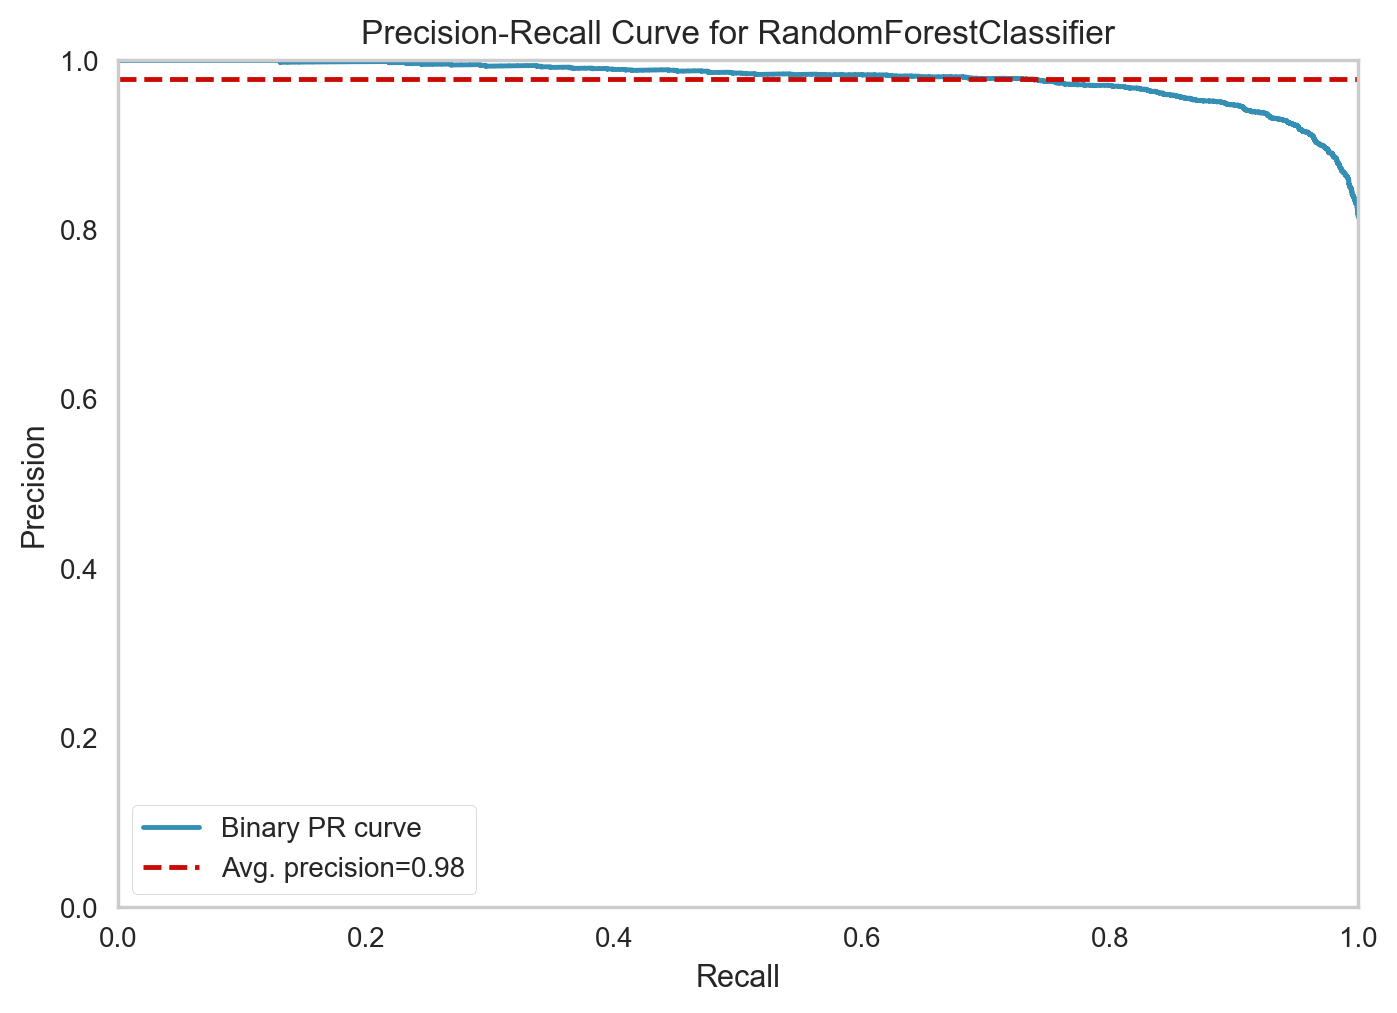

In [89]:
viz = PrecisionRecallCurve(RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced"), 
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [90]:
y_pred = rf.predict(X_test_count)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)
rf_count_AP = viz.score_

### TF-IDF

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=101)

In [92]:
eval(rf, X_train_tf_idf, X_test_tf_idf)

[[ 641  142]
 [ 480 2972]]
Test_Set
              precision    recall  f1-score   support

           0       0.57      0.82      0.67       783
           1       0.95      0.86      0.91      3452

    accuracy                           0.85      4235
   macro avg       0.76      0.84      0.79      4235
weighted avg       0.88      0.85      0.86      4235

Train_Set
              precision    recall  f1-score   support

           0       0.62      0.91      0.74      3131
           1       0.98      0.88      0.92     13809

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [93]:
model = RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.859386
train_accuracy     0.892995
test_f1            0.909964
train_f1           0.931411
test_recall        0.872474
train_recall       0.891689
test_precision     0.950997
train_precision    0.974916
dtype: float64

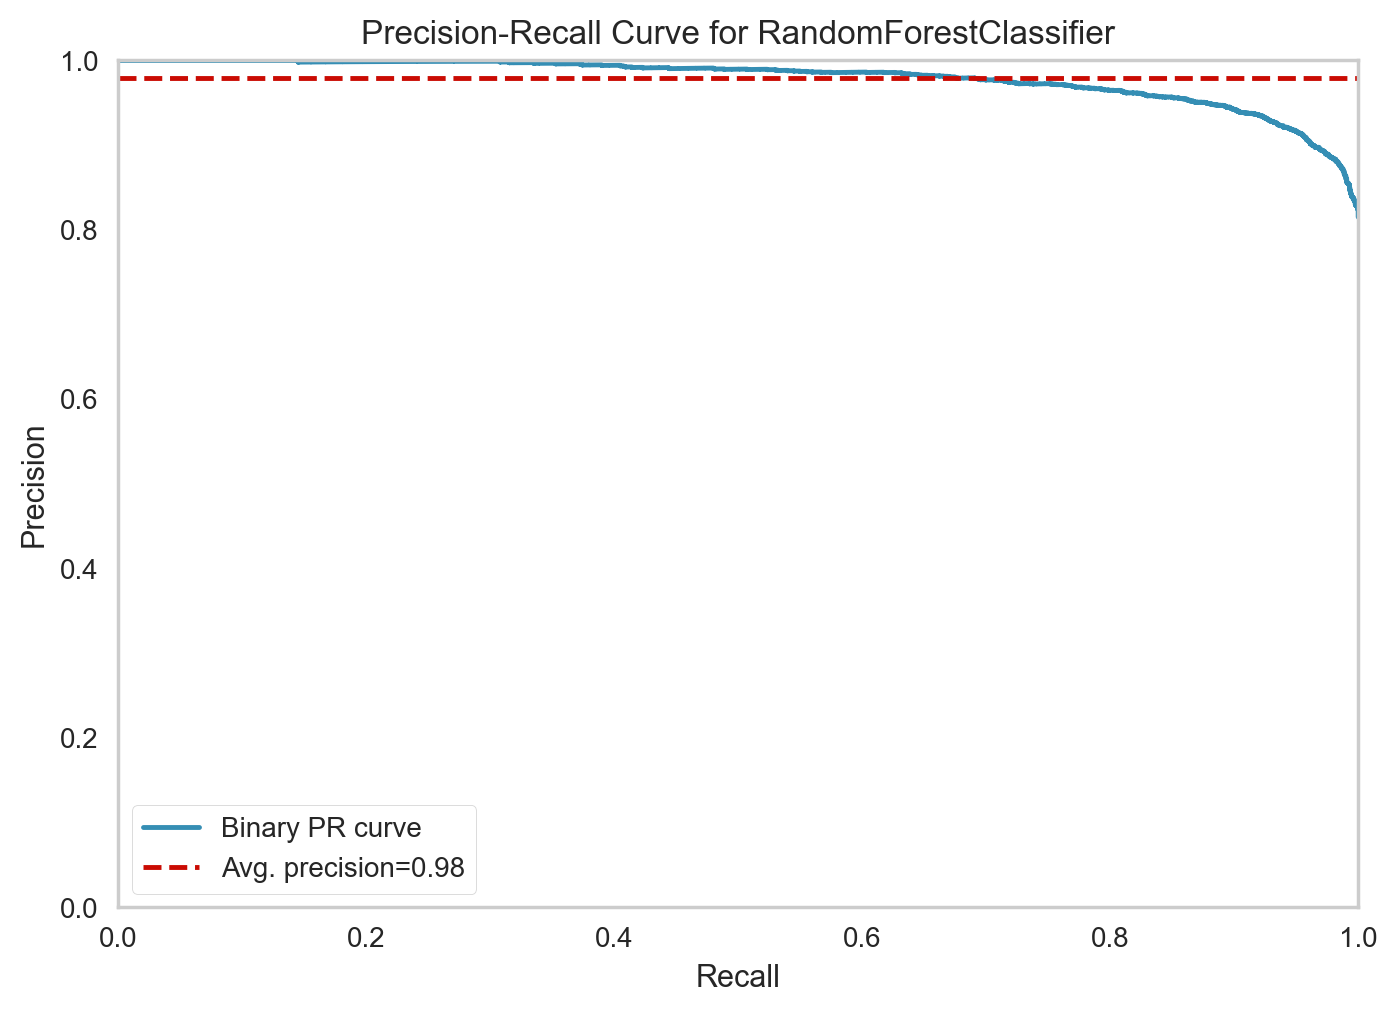

In [94]:
viz = PrecisionRecallCurve(RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [95]:
y_pred = rf.predict(X_test_tf_idf)
rf_tf_idf_rec = recall_score(y_test, y_pred)
rf_tf_idf_f1 = f1_score(y_test,y_pred)
rf_tf_idf_AP = viz.score_

## Ada Boosting

### Countvectorizer

In [96]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 400, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=400, random_state=42)

In [97]:
eval(ada, X_train_count, X_test_count)

[[ 514  269]
 [ 150 3302]]
Test_Set
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       783
           1       0.92      0.96      0.94      3452

    accuracy                           0.90      4235
   macro avg       0.85      0.81      0.83      4235
weighted avg       0.90      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.84      0.72      0.77      3131
           1       0.94      0.97      0.95     13809

    accuracy                           0.92     16940
   macro avg       0.89      0.84      0.86     16940
weighted avg       0.92      0.92      0.92     16940



In [98]:
model = AdaBoostClassifier(n_estimators= 400, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.898465
train_accuracy     0.923823
test_f1            0.938806
train_f1           0.954041
test_recall        0.955392
train_recall       0.969947
test_precision     0.922844
train_precision    0.938649
dtype: float64

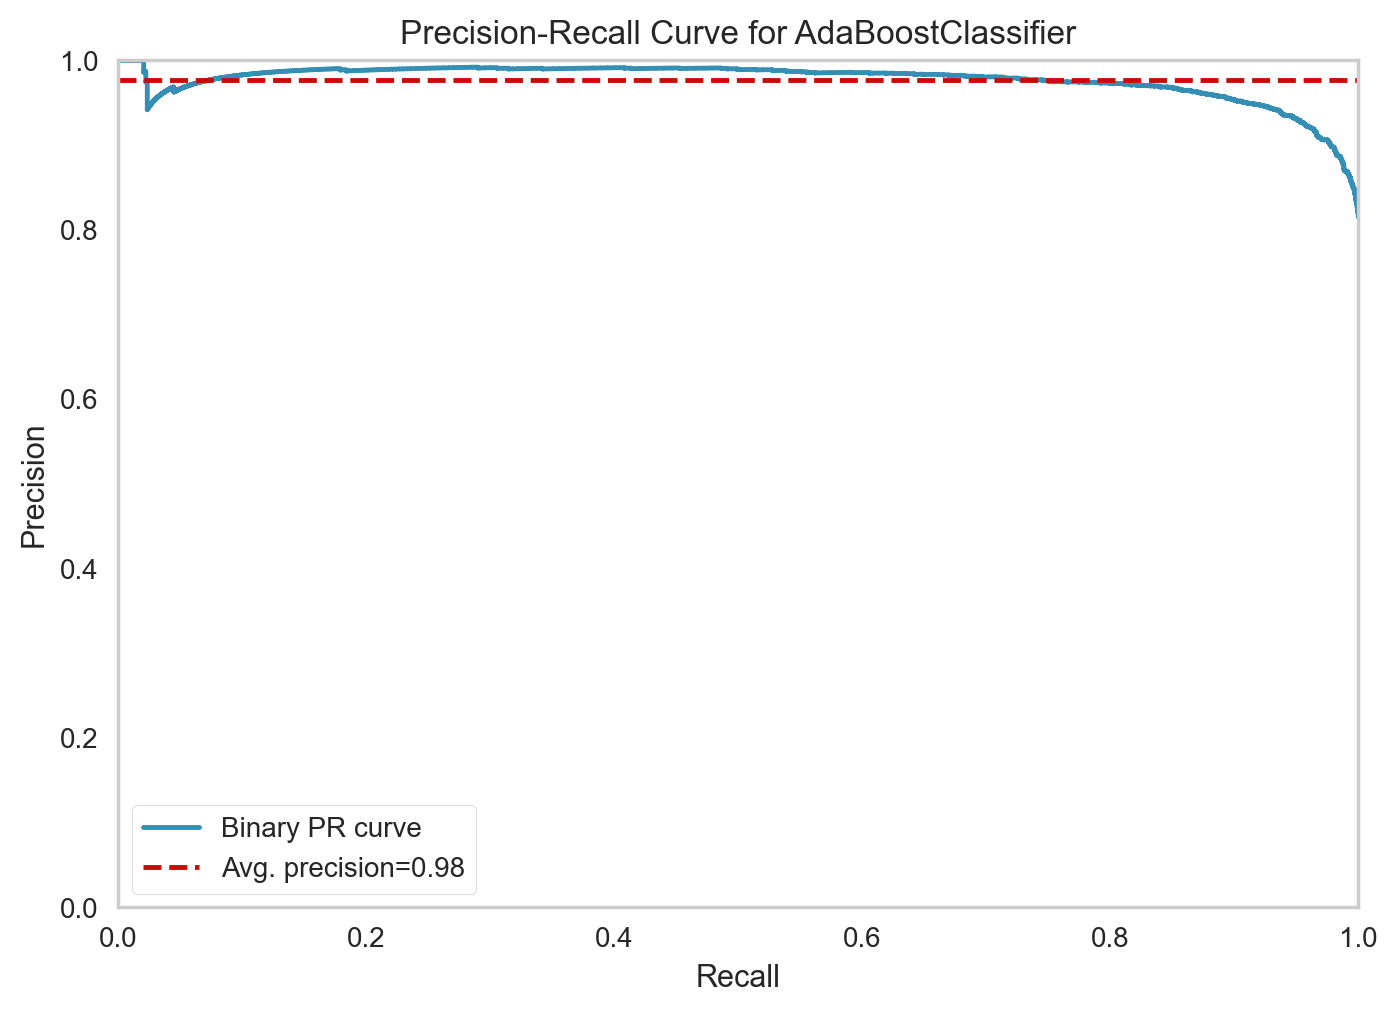

In [99]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators= 400, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [100]:
y_pred = ada.predict(X_test_count)
ad_count_rec = recall_score(y_test, y_pred)
ad_count_f1 = f1_score(y_test, y_pred)
ad_count_AP = viz.score_

### TF-IDF

In [101]:
ada = AdaBoostClassifier(n_estimators= 400, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=400, random_state=42)

In [102]:
eval(ada, X_train_tf_idf, X_test_tf_idf)

[[ 513  270]
 [ 170 3282]]
Test_Set
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       783
           1       0.92      0.95      0.94      3452

    accuracy                           0.90      4235
   macro avg       0.84      0.80      0.82      4235
weighted avg       0.89      0.90      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      3131
           1       0.95      0.97      0.96     13809

    accuracy                           0.93     16940
   macro avg       0.90      0.86      0.88     16940
weighted avg       0.93      0.93      0.93     16940



In [103]:
model = AdaBoostClassifier(n_estimators= 400, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.891204
train_accuracy     0.934461
test_f1            0.934364
train_f1           0.960291
test_recall        0.949960
train_recall       0.972136
test_precision     0.919310
train_precision    0.948731
dtype: float64

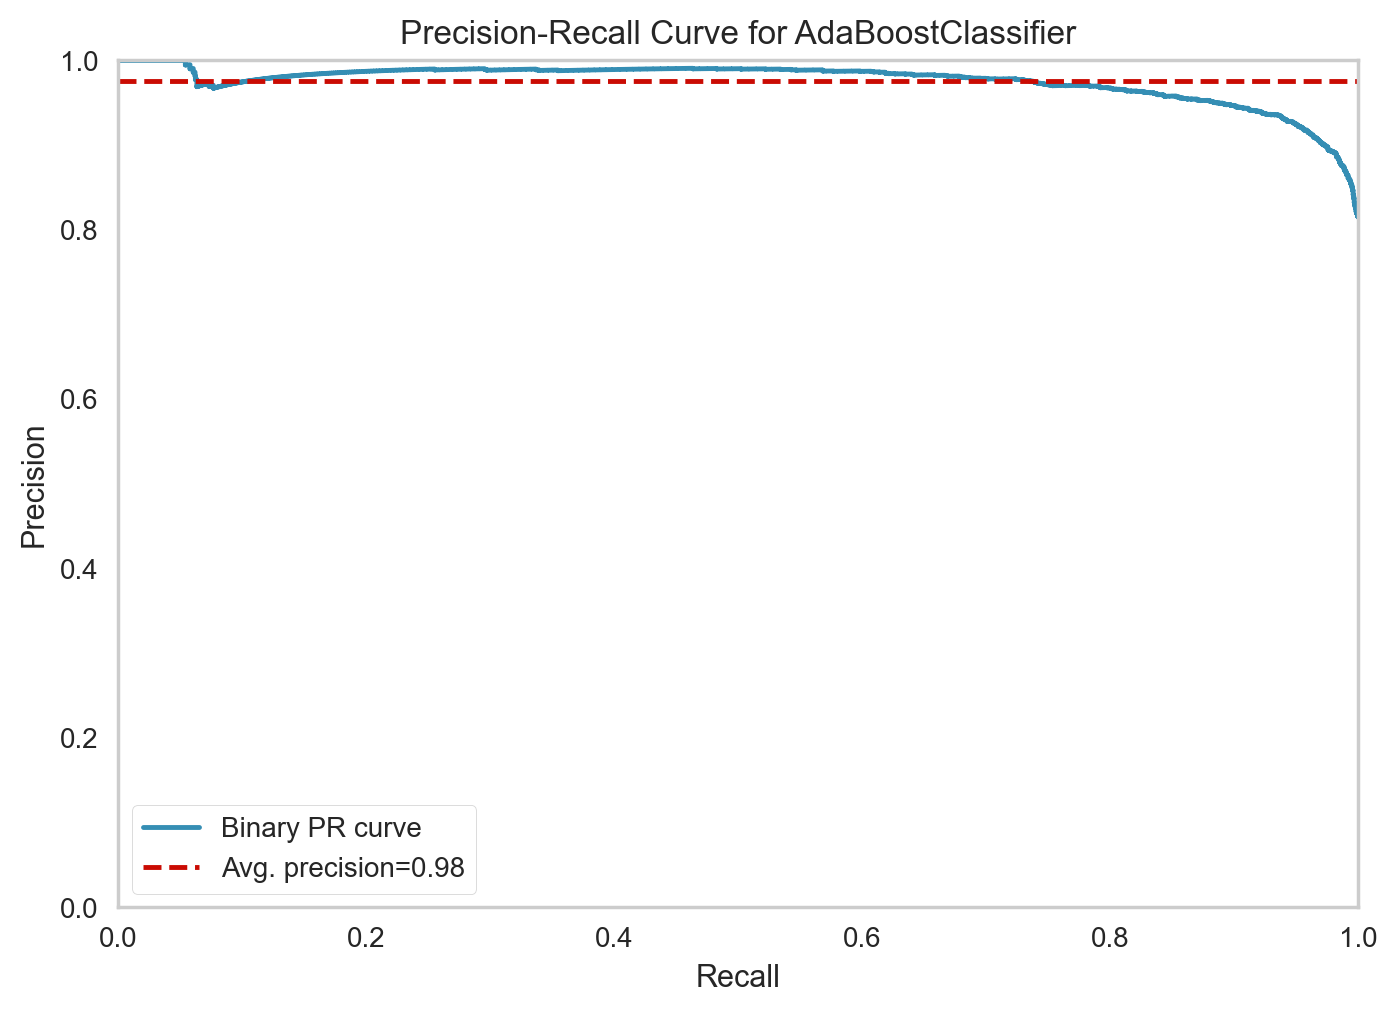

In [104]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators= 400, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [105]:
y_pred = ada.predict(X_test_tf_idf)
ad_tf_idf_rec = recall_score(y_test, y_pred)
ad_tf_idf_f1 = f1_score(y_test, y_pred)
ad_tf_idf_AP = viz.score_

## DL modeling

In [106]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [107]:
X

0                                                                                                                                                                                                                                                                                      absolutely wonderful silky sexy comfortable
1                                                                                                                                             love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2                       high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3                              

### Tokenization

In [108]:
# Types of Hyperparameters
# We will take the first 15,000 words (tokens) used the most in the corpus and ignore the rest.
# If the value is set to None, all words are taken into account.

NUM_WORDS = 10000

#creating instance of tokenizer
tokenizer = Tokenizer(num_words=NUM_WORDS)

In [109]:
tokenizer.fit_on_texts(X)

### Creating word index

In [110]:
word_index = tokenizer.word_index
word_index

{'dress': 1,
 'fit': 2,
 'size': 3,
 'love': 4,
 'top': 5,
 'color': 6,
 'like': 7,
 'look': 8,
 'wear': 9,
 'great': 10,
 'im': 11,
 'would': 12,
 'fabric': 13,
 'small': 14,
 'perfect': 15,
 'really': 16,
 'little': 17,
 'ordered': 18,
 'one': 19,
 'flattering': 20,
 'soft': 21,
 'well': 22,
 'comfortable': 23,
 'back': 24,
 'bought': 25,
 'nice': 26,
 'cute': 27,
 'beautiful': 28,
 'bit': 29,
 'material': 30,
 'shirt': 31,
 'sweater': 32,
 'large': 33,
 'jean': 34,
 'much': 35,
 'length': 36,
 'run': 37,
 'also': 38,
 'work': 39,
 'got': 40,
 'petite': 41,
 'long': 42,
 'short': 43,
 'waist': 44,
 'skirt': 45,
 'quality': 46,
 'medium': 47,
 'retailer': 48,
 'think': 49,
 'even': 50,
 'pretty': 51,
 'make': 52,
 'feel': 53,
 'x': 54,
 'pant': 55,
 'store': 56,
 'tried': 57,
 'usually': 58,
 'get': 59,
 'sleeve': 60,
 'way': 61,
 'good': 62,
 'go': 63,
 'could': 64,
 'cut': 65,
 'dont': 66,
 'big': 67,
 'black': 68,
 'made': 69,
 'still': 70,
 'right': 71,
 'true': 72,
 'super': 73,


In [111]:
len(tokenizer.word_index)

11645

### Converting tokens to numeric

In [112]:
trn_sequences = tokenizer.texts_to_sequences(X)

In [113]:
print(X[1200]) #[100] is the row number in the dataset
print(trn_sequences[1200])

lovely piece see close appreciate subtle detail typically wear xxsp xsp expect fit decided try liked style petite many poncho style overwhelm look like tent one xx fit nicely right length width lb think one reason popular show searching poncho search sweater
[130, 105, 78, 560, 940, 516, 95, 313, 9, 980, 858, 555, 2, 252, 115, 254, 74, 41, 119, 807, 74, 1955, 8, 7, 669, 19, 336, 2, 176, 71, 36, 1064, 96, 49, 19, 471, 2363, 212, 1181, 807, 1764, 32]


### Maximum number of tokens for all documents¶

In [114]:
len(trn_sequences[105])

41

In [115]:
len(trn_sequences[105])

41

In [116]:
len(X[105])

270

In [117]:
num_tokens = [len(tokens) for tokens in trn_sequences]
num_tokens = np.array(num_tokens)

In [118]:
num_tokens

array([ 5, 30, 47, ..., 11, 19, 10])

In [119]:
num_tokens.mean()

28.110791027154665

In [120]:
num_tokens.max()

58

In [121]:
num_tokens.argmax()

11189

In [122]:
MAX_TOKENS = 58

In [123]:
print(len(num_tokens))
print(sum(num_tokens < MAX_TOKENS))

21175
21174


In [124]:
sum(num_tokens < MAX_TOKENS) / len(num_tokens)

0.9999527744982291

### Fixing token counts of all documents (pad_sequences)

In [125]:
max_length = max([len(x) for x in trn_sequences])
trn_padded = pad_sequences(trn_sequences, maxlen=max_length)

In [126]:
max_length

58

In [127]:
trn_padded.shape

(21175, 58)

### Train Set Split

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(trn_padded, y, test_size=0.2, stratify=y, random_state=101)

### Modeling

In [130]:
model = Sequential()

In [131]:
embedding_size = 100

In [132]:
model.add(Embedding(input_dim=NUM_WORDS,
                  output_dim=embedding_size,
                  input_length=max_length)) 


In [133]:
model.add(GRU(units=48, return_sequences=True)) 
model.add(GRU(units=24, return_sequences=True))   
model.add(GRU(units=12))  
model.add(Dense(1, activation='sigmoid')) 

In [134]:
optimizer = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [135]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 58, 100)           1000000   
                                                                 
 gru (GRU)                   (None, 58, 48)            21600     
                                                                 
 gru_1 (GRU)                 (None, 58, 24)            5328      
                                                                 
 gru_2 (GRU)                 (None, 12)                1368      
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 1,028,309
Trainable params: 1,028,309
Non-trainable params: 0
_________________________________________________________________


In [136]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_accuracy", mode="auto", 
                           verbose=1, patience = 5, restore_best_weights=True)

In [137]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61336809, 2.705206  ])

In [138]:
model.fit(X_train, y_train, epochs=25, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25


2023-02-12 17:45:48.194832: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


133/133 [==============================] - 10s 61ms/step - loss: 0.3890 - recall: 0.8269 - val_loss: 0.2243 - val_recall: 0.9548
Epoch 2/25
133/133 [==============================] - 8s 61ms/step - loss: 0.2142 - recall: 0.9088 - val_loss: 0.2790 - val_recall: 0.8850
Epoch 3/25
133/133 [==============================] - 8s 61ms/step - loss: 0.1443 - recall: 0.9420 - val_loss: 0.2771 - val_recall: 0.9041
Epoch 4/25
133/133 [==============================] - 8s 62ms/step - loss: 0.0991 - recall: 0.9614 - val_loss: 0.3216 - val_recall: 0.9053
Epoch 5/25
133/133 [==============================] - 8s 63ms/step - loss: 0.1002 - recall: 0.9568 - val_loss: 0.2990 - val_recall: 0.9209
Epoch 6/25
133/133 [==============================] - 8s 63ms/step - loss: 0.0793 - recall: 0.9686 - val_loss: 0.3620 - val_recall: 0.9279
Epoch 7/25
133/133 [==============================] - 9s 65ms/step - loss: 0.0483 - recall: 0.9812 - val_loss: 0.4404 - val_recall: 0.8940
Epoch 8/25
133/133 [=================

### Model Evaluation

In [139]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss    recall  val_loss  val_recall
0  0.389038  0.826852  0.224280    0.954809
1  0.214245  0.908755  0.278998    0.884994
2  0.144284  0.941994  0.277058    0.904114
3  0.099143  0.961402  0.321579    0.905272
4  0.100157  0.956840  0.298968    0.920915

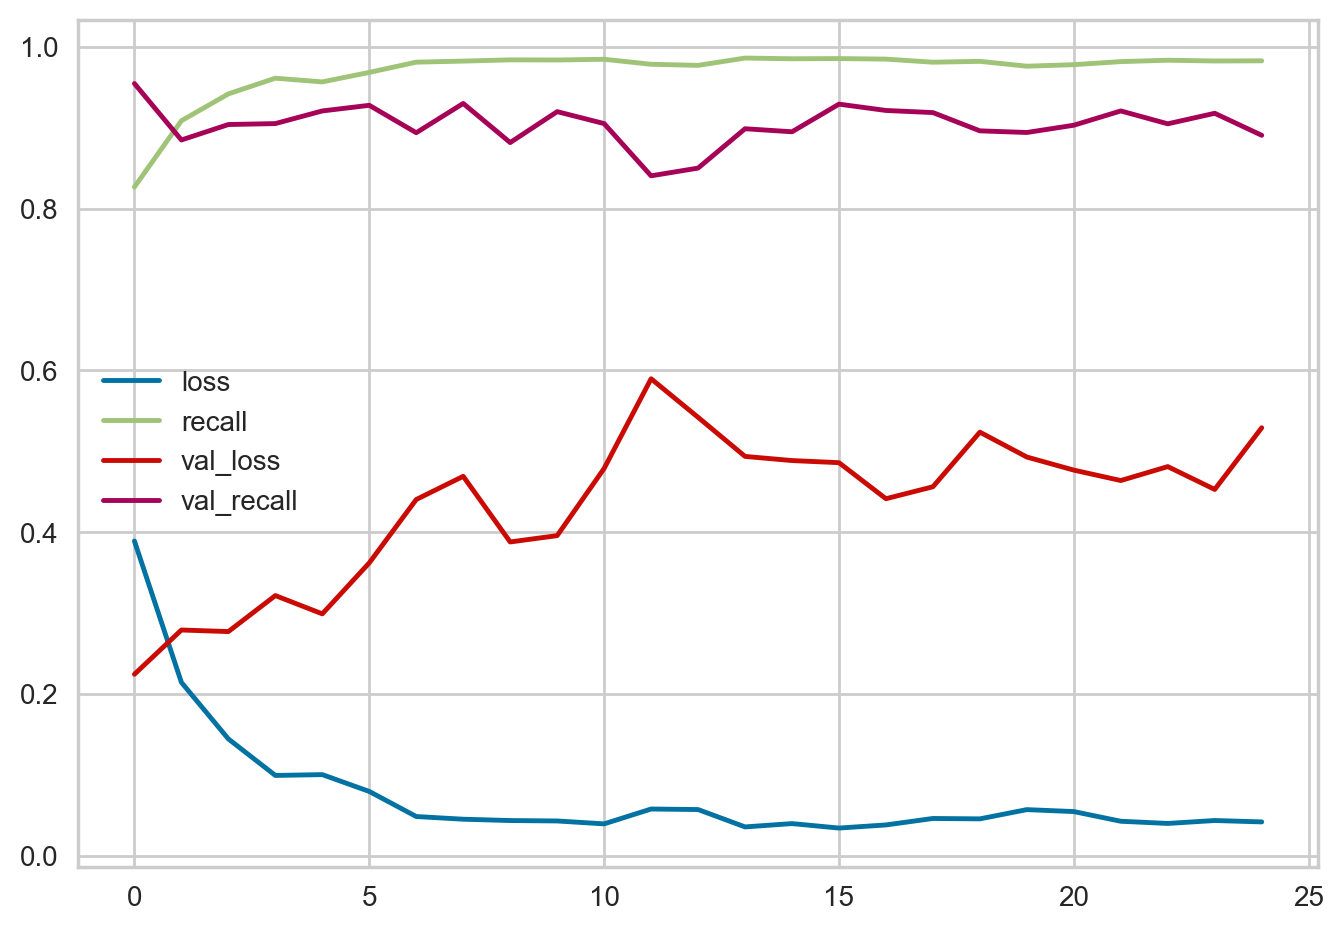

In [140]:
model_loss.plot();

In [141]:
model.evaluate(X_train, y_train)

530/530 [==============================] - 3s 6ms/step - loss: 0.0432 - recall: 0.9824


[0.04319728538393974, 0.9824028015136719]

In [142]:
model.evaluate(X_test, y_test) 

133/133 [==============================] - 1s 6ms/step - loss: 0.5291 - recall: 0.8908


[0.5290992259979248, 0.8907879590988159]

In [143]:
#y_prediction = model.predict(X_test)

In [144]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

530/530 [==============================] - 3s 5ms/step
[[ 3121    10]
 [  243 13566]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3131
           1       1.00      0.98      0.99     13809

    accuracy                           0.99     16940
   macro avg       0.96      0.99      0.98     16940
weighted avg       0.99      0.99      0.99     16940



In [145]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

530/530 [==============================] - 3s 6ms/step
[[ 3121    10]
 [  243 13566]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3131
           1       1.00      0.98      0.99     13809

    accuracy                           0.99     16940
   macro avg       0.96      0.99      0.98     16940
weighted avg       0.99      0.99      0.99     16940



In [146]:
from sklearn.metrics import precision_recall_curve, average_precision_score

133/133 [==============================] - 1s 6ms/step


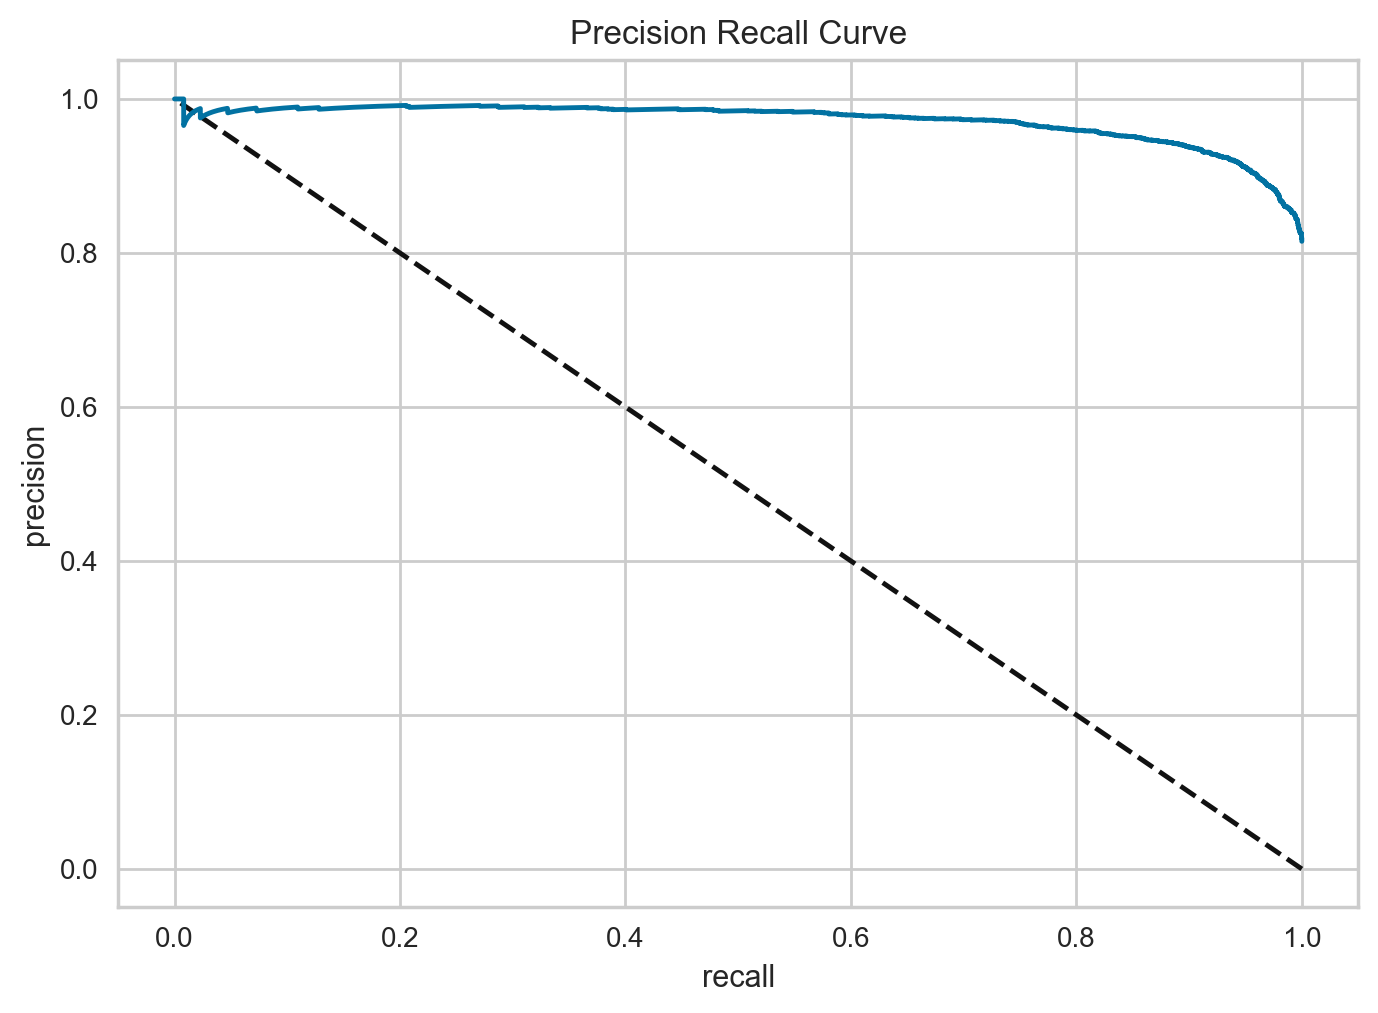

In [147]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [148]:
average_precision_score(y_test, y_pred_proba)

0.9717945745666383

In [149]:
DL_rec = recall_score(y_test, y_pred)
DL_f1 = f1_score(y_test, y_pred)
DL_AP = average_precision_score(y_test, y_pred_proba)

### Model Saving

In [150]:
model.save('/Users/lavondaharrison/Desktop/Clarusway/Machine Learning Module/NLP/NLP Project/Project NLP/NLP_Sentiment_Analysis_Project')

INFO:tensorflow:Assets written to: /Users/lavondaharrison/Desktop/Clarusway/Machine Learning Module/NLP/NLP Project/Project NLP/NLP_Sentiment_Analysis_Project/assets


INFO:tensorflow:Assets written to: /Users/lavondaharrison/Desktop/Clarusway/Machine Learning Module/NLP/NLP Project/Project NLP/NLP_Sentiment_Analysis_Project/assets


## BERT Modeling

In [151]:
# Import necessary libraries
from transformers import BertTokenizer, BertForSequenceClassification, AutoTokenizer

### Tokenization

In [152]:
df3 = df[["Review Text", "Recommended IND"]]
df3.head()

Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Absolutely wonderful - silky and sexy and comfortable   
1                                                                                                                                                                                                       Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c   
3                                                                                                                                                                                                                                                                                                                                                                                          I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                                                                                                                                                                                                                                      This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Recommended IND  
0                1  
1                1  
2                0  
3                1  
4                1

In [153]:
#drop all rows that contain missing values and rest the index of the dataframe; drop = True meaning that the current index will be dropped and the new index will be used
df3 = df3.dropna(subset=["Review Text"], axis=0)
df3 = df3.reset_index(drop = True)
df3.shape

(21175, 2)

In [154]:
X= df3["Review Text"]
y = df3["Recommended IND"]

In [155]:
X.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                         Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is tr

In [156]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import SnowballStemmer
# from transformers import AutoTokenizer

# def preprocess_and_tokenize(data):
    
#     # Initialize the tokenizer for the BERT-base-uncased model
#     tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

#     # Initialize NLTK stop words and Snowball stemmer
#     stop_words = set(stopwords.words('english'))
#     stemmer = SnowballStemmer('english')

#     # Create an empty list to store the length of tokenized sentences
#     max_token_lengths = []

#     # Loop through each sentence in the input data
#     for sent in X:

#         # Preprocess the sentence using nltk
#         words = word_tokenize(str(sent))
#         words = [word for word in words if word.lower() not in stop_words]
#         words = [stemmer.stem(word) for word in words]
#         processed_sent = ' '.join(words)

#         # Tokenize the processed sentence and add the special tokens [CLS] and [SEP]
#         input_ids = tokenizer.encode(processed_sent, add_special_tokens=True)

#         # Append the length of the tokenized sentence to the max_token_lengths list
#         max_token_lengths.append(len(input_ids))

#     # Return the maximum length of the tokenized sentences
#     return max(max_token_lengths)


In [157]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from transformers import AutoTokenizer

# Initialize the tokenizer for the BERT-base-uncased model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Initialize NLTK stop words and Snowball stemmer
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

# Create an empty list to store the length of tokenized sentences
max_token_lengths = []

# Loop through each sentence in the input data
for sent in X:

    # Preprocess the sentence using nltk
    words = word_tokenize(str(sent))
    words = [word for word in words if word.lower() not in stop_words]
    words = [stemmer.stem(word) for word in words]
    processed_sent = ' '.join(words)

    # Tokenize the processed sentence and add the special tokens [CLS] and [SEP]
    input_ids = tokenizer.encode(processed_sent, add_special_tokens=True)

    # Append the length of the tokenized sentence to the max_token_lengths list
    max_token_lengths.append(len(input_ids))

# Print the maximum length of the tokenized sentences
print("Max token length:", max(max_token_lengths))


Max token length: 130


In [158]:
import numpy as np
max_len = np.max(max_token_lengths)
max_len

130

In [159]:
# The code is finding the maximum length of the tokenized sentences by encoding each sentence in X using the tokenizer.encode method, 
# which adds special tokens to the beginning and end of the sentence, and appending the length of the resulting tokenized sentence to a list max_token. 
# The maximum length of the tokenized sentences is then determined by finding the maximum length in the list max_token using the max function.

# from transformers import AutoTokenizer

# # Initialize the tokenizer for the BERT-base-uncased model
# tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# # Create an empty list to store the length of tokenized sentences
# max_token_lengths = []

# # Loop through each sentence in the input data
# for sent in X2:

# # Tokenize the sentence and add the special tokens [CLS] and [SEP]
# input_ids = tokenizer.encode(str(sent), add_special_tokens=True)

# # Append the length of the tokenized sentence to the max_token_lengths list
# max_token_lengths.append(len(input_ids))

# # Print the maximum length of the tokenized sentences
# print("Max token length:", max(max_token_lengths))


In [160]:
import numpy as np 
np.array(max_token_lengths).mean()

51.19390791027155

In [161]:
print(input_ids)

[101, 4377, 2293, 8899, 10768, 25300, 2078, 4906, 3819, 1010, 19413, 5332, 4929, 4012, 8873, 1010, 999, 2152, 16755, 999, 102]


In [162]:
sum(np.array(max_token_lengths) <= 130) / len(max_token_lengths)

1.0

### Train test split

In [163]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

In [164]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [165]:
def transformation(X, seq_len=130):
    # set sequence length to 130 if not in the valid range
    if seq_len < 0 or seq_len > 130:
        seq_len = 130

    Xids = []
    Xmask = []

    for text in X:
        if not isinstance(text, str):
            # if text is not a string, skip it
            continue
        tokens = tokenizer.encode_plus(text.lower(), max_length=seq_len, truncation=True,
                                       padding='max_length', add_special_tokens=True,
                                       return_tensors='tf')
        Xids.append(tokens['input_ids'].numpy().tolist()[0])
        Xmask.append(tokens['attention_mask'].numpy().tolist()[0])

    return np.array(Xids), np.array(Xmask), seq_len


In [166]:
#Xids, Xmask, seq_len = transformation(X, seq_len=max_len)

In [167]:
Xids_test, Xmask_test, seq_len_test = transformation(X_test2)

In [168]:
Xids_train, Xmask_train, seq_len_train = transformation(X_train2)


In [169]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (19057, 130)
Xmask_train.shape : (19057, 130)
Xids_test.shape   : (2118, 130)
Xmask_test.shape  : (2118, 130)


In [170]:
labels_train = y_train2.values.reshape(-1,1)
labels_train

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [171]:
labels_test = y_test2.values.reshape(-1,1)
labels_test

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [172]:
labels_train.shape, labels_test.shape

((19057, 1), (2118, 1))

In [173]:
Xids_train, Xmask_train

(array([[ 101, 2023, 4377, ...,    0,    0,    0],
        [ 101, 2009, 2003, ...,    0,    0,    0],
        [ 101, 2079, 2025, ...,    0,    0,    0],
        ...,
        [ 101, 1045, 2514, ..., 4995, 1005,  102],
        [ 101, 1045, 3641, ...,    0,    0,    0],
        [ 101, 3376, 2327, ...,    0,    0,    0]]),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]))

### Transformation text to 3D tensor

In [174]:
import tensorflow as tf

train_data = (Xids_train, Xmask_train, labels_train)
test_data = (Xids_test, Xmask_test, labels_test)

def format_data(Xids, Xmask, labels):
    return {"input_ids": Xids, "attention_mask": Xmask}, labels

dataset_train = tf.data.Dataset.from_tensor_slices(train_data).map(format_data)
dataset_test = tf.data.Dataset.from_tensor_slices(test_data).map(format_data)


In [177]:
dataset_test

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(130,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(130,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [178]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(130,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(130,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [180]:
batch_size = 32

leng= len(Xids_train)

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [183]:
from official.nlp import optimization
epochs = 2

steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')


In [184]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1192
119


In [ ]:
# %pip install tensorflow
# %pip install tensorflow-datasets
# %pip install tensorflow-model-optimization
# %pip install --upgrade pip

### Creating Model

In [185]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = Input(shape=(130,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(130,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] 

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x) 
    x = Dropout(0.1, name="dropout")(x) 
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y) 

In [186]:
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():

  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  
  optimizer = optimizer #Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy() 
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [187]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 130)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 130)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 130,                                           

In [ ]:
# code below had to be use because of this error: ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 130), found shape=(None, 32, 130)
# The issue is that the input shape for the model is expecting a 2-dimensional tensor of shape (None, 130), but it is receiving a 3-dimensional tensor of shape (None, 32, 130). 
# To fix this, you need to make sure the input data matches the expected shape.
# to modify the input data to match the expected shape by using the .batch method from the training and validation datasets.

def prepare_data(xy):
  return ({'input_ids': xy[0][0], 'attention_mask': xy[0][1]}, xy[1])

train_ds = train_ds.batch(32).map(prepare_data)
val_ds = val_ds.batch(32).map(prepare_data)


In [190]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs) 

In [191]:
model3.fit(train_ds,
          validation_data=val_ds,
          epochs=2,
          batch_size=32,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)],
          use_multiprocessing=True)


Epoch 1/2


2023-02-12 21:38:08.288684: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_3"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
input: "Placeholder/_2"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_INT64
      type: DT_INT64
      type: DT_INT64
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 19057
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\026TensorSliceDataset:249"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 1
        }
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  valu

596/596 [==============================] - ETA: 0s - loss: 0.1451 - recall: 0.9815 

2023-02-12 23:31:32.092220: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


596/596 [==============================] - 6918s 12s/step - loss: 0.1451 - recall: 0.9815 - val_loss: 0.3115 - val_recall: 0.9780
Epoch 2/2


2023-02-12 23:33:26.785616: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


596/596 [==============================] - ETA: 0s - loss: 0.1462 - recall: 0.9816  

2023-02-13 10:29:46.367758: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


596/596 [==============================] - 39495s 66s/step - loss: 0.1462 - recall: 0.9816 - val_loss: 0.3117 - val_recall: 0.9780


In [192]:
# model3.fit(train_ds,
#           validation_data=val_ds,
#           epochs=2,
#           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

### Model evaluation

In [193]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

loss    recall  val_loss  val_recall
0  0.145074  0.981524  0.311508    0.977997
1  0.146214  0.981589  0.311652    0.977997

<AxesSubplot:>

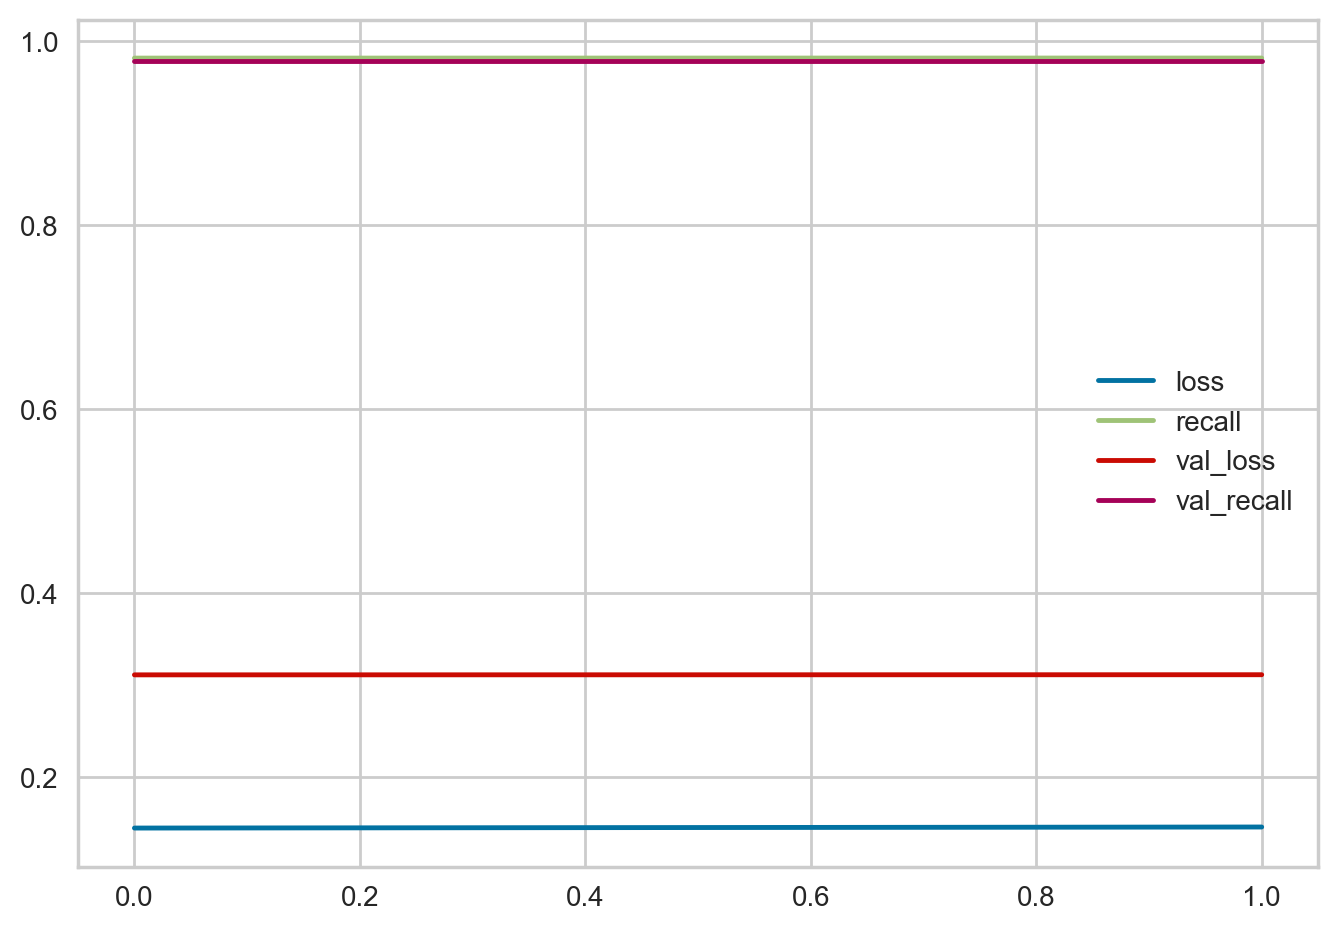

In [194]:
model_loss.plot()

In [198]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]

print(classification_report(y_test, y_pred))

2023-02-13 11:30:18.336295: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_3"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
input: "Placeholder/_2"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_INT64
      type: DT_INT64
      type: DT_INT64
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 2118
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\026TensorSliceDataset:251"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 1
        }
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  value

67/67 [==============================] - 118s 2s/step
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       391
           1       0.96      0.98      0.97      1727

    accuracy                           0.95      2118
   macro avg       0.93      0.90      0.92      2118
weighted avg       0.95      0.95      0.95      2118



In [199]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred)) 

2023-02-13 11:38:43.795097: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_3"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
input: "Placeholder/_2"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_INT64
      type: DT_INT64
      type: DT_INT64
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 19057
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\026TensorSliceDataset:249"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 1
        }
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  valu

596/596 [==============================] - 1054s 2s/step
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3523
           1       0.98      0.99      0.98     15534

    accuracy                           0.98     19057
   macro avg       0.96      0.96      0.96     19057
weighted avg       0.98      0.98      0.98     19057



In [196]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred)) 

2023-02-13 10:35:55.112242: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_3"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
input: "Placeholder/_2"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_INT64
      type: DT_INT64
      type: DT_INT64
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 19057
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\026TensorSliceDataset:249"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 1
        }
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  valu

596/596 [==============================] - 1038s 2s/step
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3523
           1       0.98      0.99      0.98     15534

    accuracy                           0.98     19057
   macro avg       0.96      0.96      0.96     19057
weighted avg       0.98      0.98      0.98     19057



2023-02-13 14:22:25.770710: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_3"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
input: "Placeholder/_2"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_INT64
      type: DT_INT64
      type: DT_INT64
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 2118
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\026TensorSliceDataset:251"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 1
        }
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  value

67/67 [==============================] - 115s 2s/step


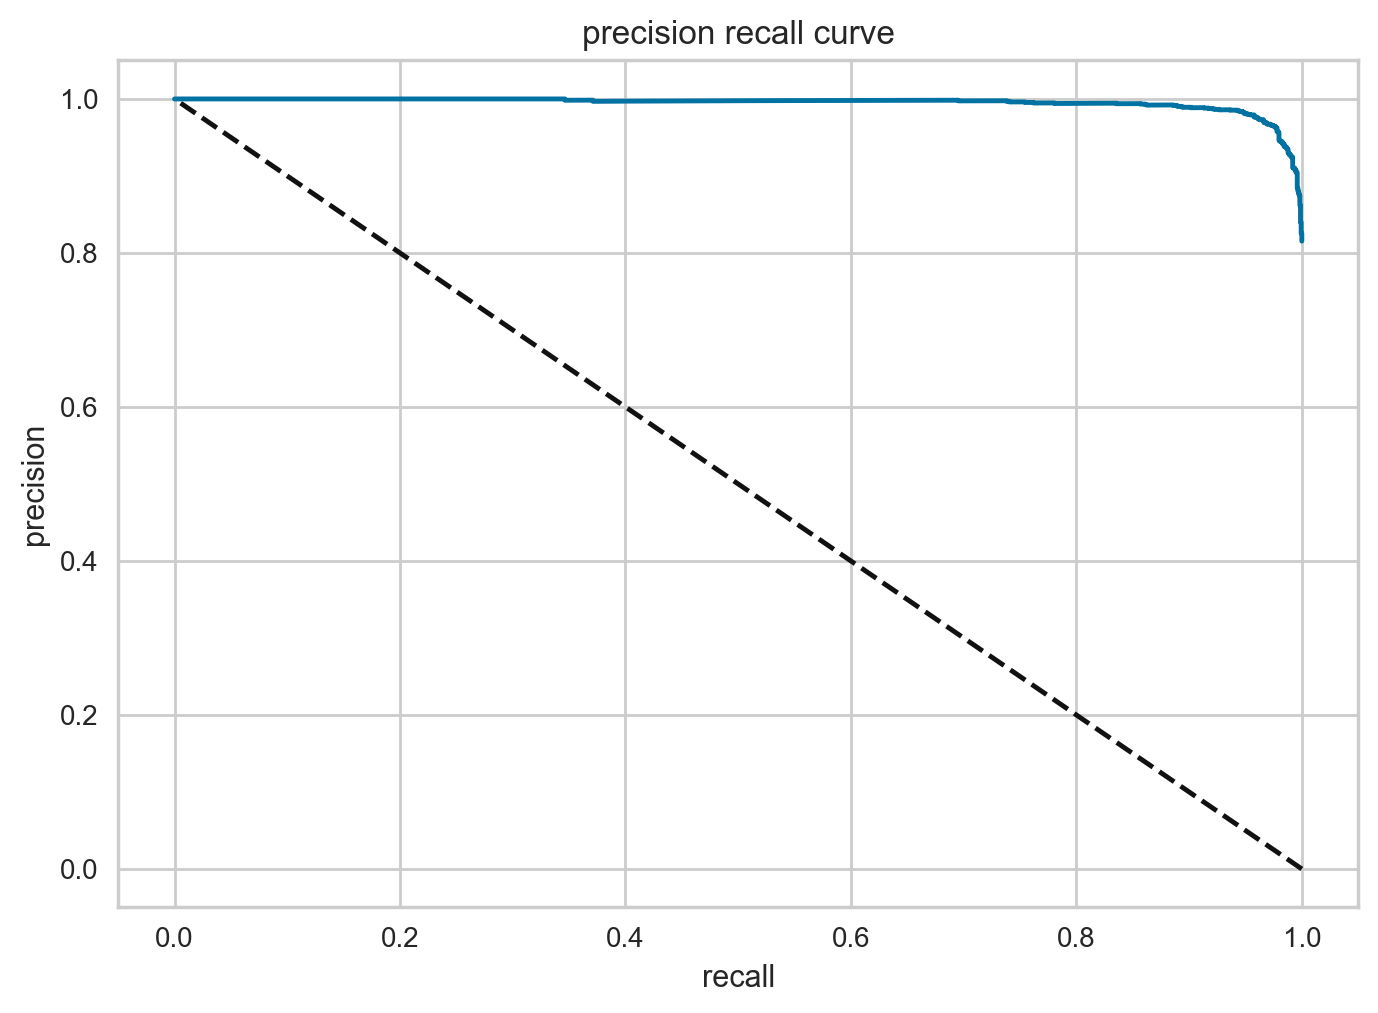

In [200]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [202]:
# y_pred_proba = model3.predict(val_ds)

# PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
# plt.show();

In [203]:
average_precision_score(y_test2, y_pred_proba)

0.9949180328967226

In [204]:
BERT_no_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_no_weighted_f1 = f1_score(y_test2, y_pred)
BERT_no_weighted_rec = recall_score(y_test2, y_pred)

### BERT Model with Weight

In [205]:
pd.Series(y).value_counts(normalize=True)

1    0.815159
0    0.184841
Name: Recommended IND, dtype: float64

In [206]:
weights = {0:0.2, 1:0.8}

In [207]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs, class_weight=weights) 

Epoch 1/2


2023-02-13 14:27:22.574212: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_3"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
input: "Placeholder/_2"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_INT64
      type: DT_INT64
      type: DT_INT64
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 19057
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\026TensorSliceDataset:249"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 1
        }
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  valu

596/596 [==============================] - ETA: 0s - loss: 0.0946 - recall: 0.9815

2023-02-13 15:46:57.257184: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_3"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
input: "Placeholder/_2"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_INT64
      type: DT_INT64
      type: DT_INT64
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 2118
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\026TensorSliceDataset:251"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 1
        }
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  value

596/596 [==============================] - 4889s 8s/step - loss: 0.0946 - recall: 0.9815 - val_loss: 0.3113 - val_recall: 0.9780
Epoch 2/2


2023-02-13 15:48:51.682763: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


596/596 [==============================] - ETA: 0s - loss: 0.0945 - recall: 0.9813

2023-02-13 16:58:30.666359: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


596/596 [==============================] - 4296s 7s/step - loss: 0.0945 - recall: 0.9813 - val_loss: 0.3109 - val_recall: 0.9780


In [211]:
y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]

print(classification_report(y_test, y_pred))

2023-02-13 17:24:38.359247: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_3"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
input: "Placeholder/_2"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_INT64
      type: DT_INT64
      type: DT_INT64
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 2118
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\026TensorSliceDataset:251"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 1
        }
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  value

67/67 [==============================] - 114s 2s/step
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       391
           1       0.96      0.98      0.97      1727

    accuracy                           0.95      2118
   macro avg       0.93      0.90      0.92      2118
weighted avg       0.95      0.95      0.95      2118



In [208]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred)) 

2023-02-13 17:00:28.173867: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_3"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
input: "Placeholder/_2"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_INT64
      type: DT_INT64
      type: DT_INT64
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 19057
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\026TensorSliceDataset:249"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 1
        }
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  valu

596/596 [==============================] - 1336s 2s/step
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3523
           1       0.98      0.99      0.98     15534

    accuracy                           0.98     19057
   macro avg       0.96      0.96      0.96     19057
weighted avg       0.97      0.98      0.97     19057



In [209]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test, y_pred_proba)

2023-02-13 17:22:44.355449: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_3"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
input: "Placeholder/_2"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_INT64
      type: DT_INT64
      type: DT_INT64
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 2118
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\026TensorSliceDataset:251"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 130
        }
      }
      shape {
        dim {
          size: 1
        }
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  value

67/67 [==============================] - 114s 2s/step


0.9949199932266617

In [210]:
BERT_Weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_Weighted_f1 = f1_score(y_test, y_pred)
BERT_Weighted_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

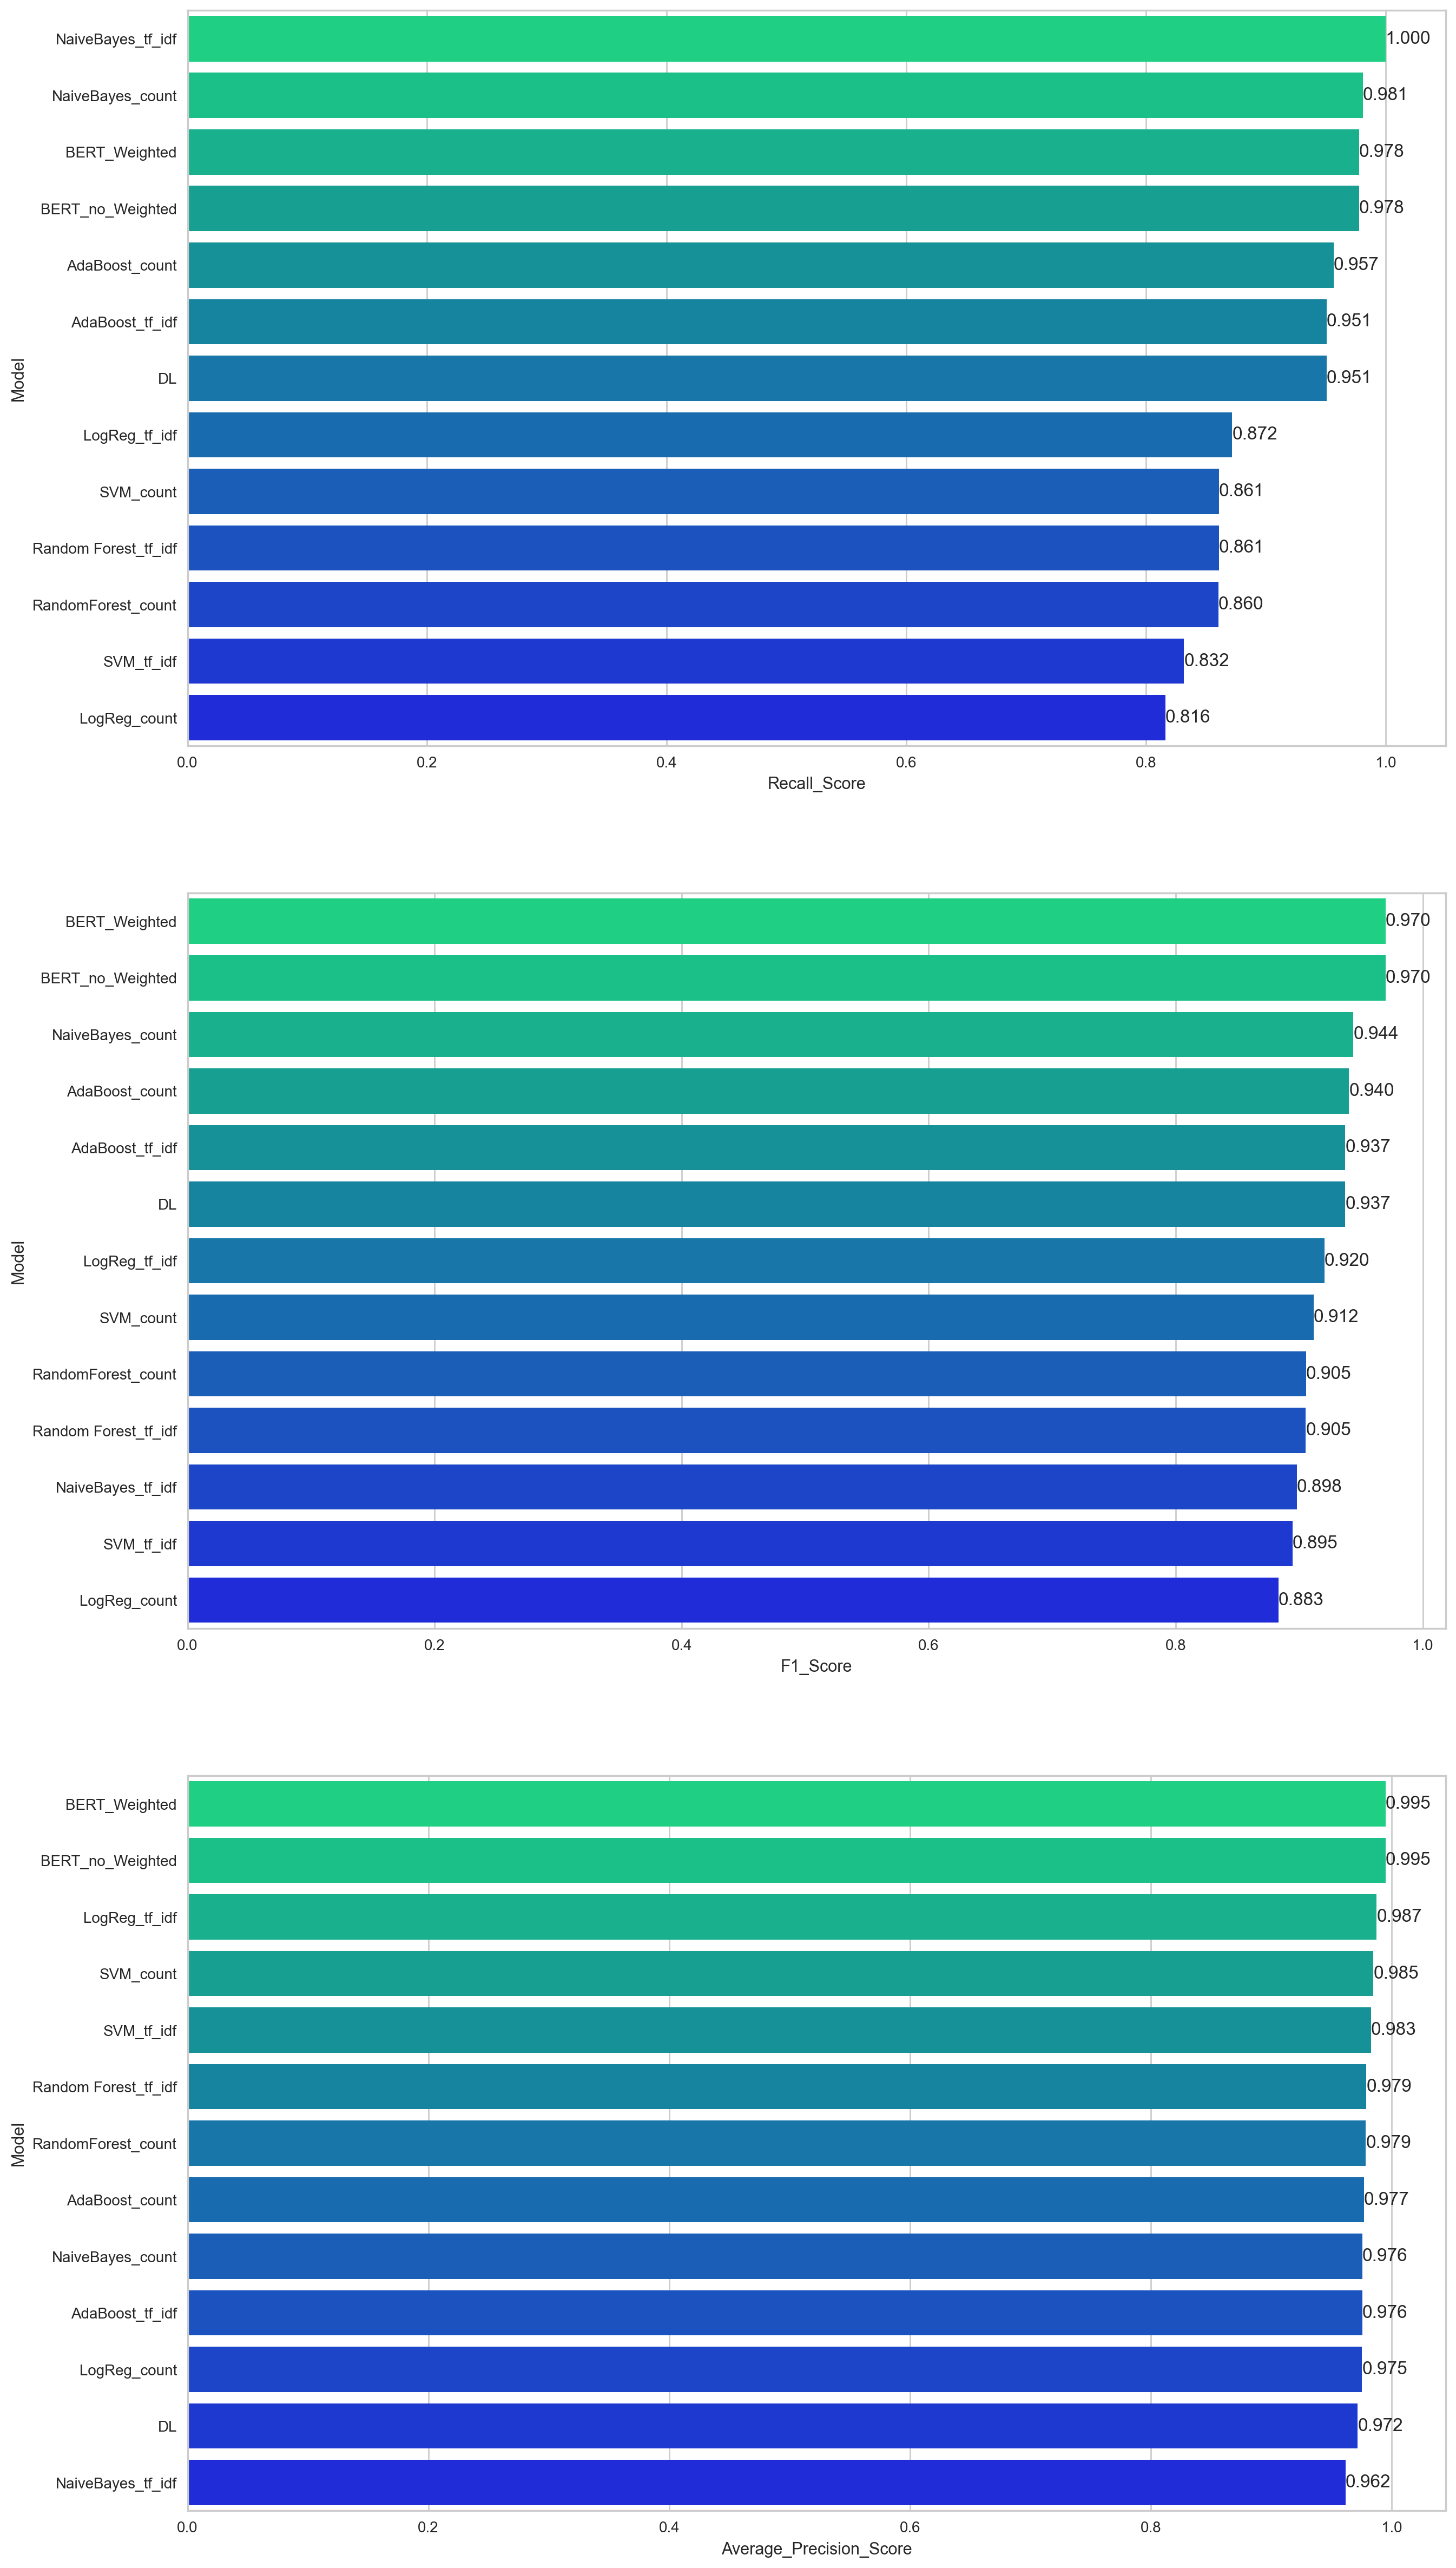

In [212]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "RandomForest_count", 
                                  "AdaBoost_count", "NaiveBayes_tf_idf", "LogReg_tf_idf", "SVM_tf_idf", 
                                  "Random Forest_tf_idf", "AdaBoost_tf_idf", "DL", "BERT_Weighted", "BERT_no_Weighted"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ad_count_f1, nb_tf_idf_f1, log_tf_idf_f1,
                                             svc_tf_id__f1, rf_tf_idf_f1, ad_tf_idf_f1, DL_f1, BERT_Weighted_f1, BERT_no_weighted_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ad_count_rec, 
                                                  nb_tf_idf_rec, log_tf_idf_rec, svc_tf_id_rec, 
                                                  rf_tf_idf_rec, ad_tf_idf_rec, DL_rec, BERT_Weighted_rec, BERT_no_weighted_rec],
                        
                        "Average_Precision_Score": [nb_count_AP, log_count_AP, svc_count_AP, rf_count_AP,
                                                   ad_count_AP, nb_tf_idf_AP, log_tf_idf_AP, svc_tf_id__AP,
                                                   rf_tf_idf_AP, ad_tf_idf_AP, DL_AP, BERT_Weighted_AP, BERT_no_weighted_AP]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="winter_r")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="winter_r")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="winter_r")
labels(ax)
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___